## 1.1 Loading Data

In [1]:
import numpy as np
import math as math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.figure_factory import create_distplot
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

py.offline.init_notebook_mode(connected=True)
%matplotlib inline


In [2]:
housingdf = pd.read_csv('./Datasets/train.csv')
housingdf = housingdf.drop(['Id'], axis = 1)

In [3]:
testdf = pd.read_csv('./Datasets/test.csv')
testid = testdf['Id'].copy()
testdf = testdf.drop(['Id'], axis = 1)

In [4]:
print(housingdf.shape)
print(testdf.shape)

(1460, 80)
(1459, 79)


In [5]:
housingdf.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
testdf.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [7]:
totaldf = pd.concat([housingdf, testdf], axis = 0, ignore_index = False)


In [8]:
#making a copy
totalhousing = totaldf.copy()

In [9]:
#drop the response variable
housingtrainy = housingdf[['SalePrice']]
totalhousing = totalhousing.drop(['SalePrice'], axis = 1)

In [10]:
totalhousing.shape

(2919, 79)

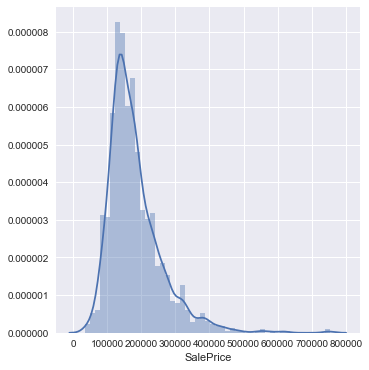

In [11]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.subplot(1, 2, 1)
sns.distplot(housingdf['SalePrice'])


In [12]:
hist_data = [np.array(np.log1p(housingdf['SalePrice']))]
group_labels = ['Log Sales Price Distribution']
fig = ff.create_distplot(hist_data, group_labels, bin_size=.1)
py.offline.iplot(fig, filename='Basic Distplot')

## 2.1 Imputation & Visualization

In [13]:
import missingno as msno
%matplotlib inline

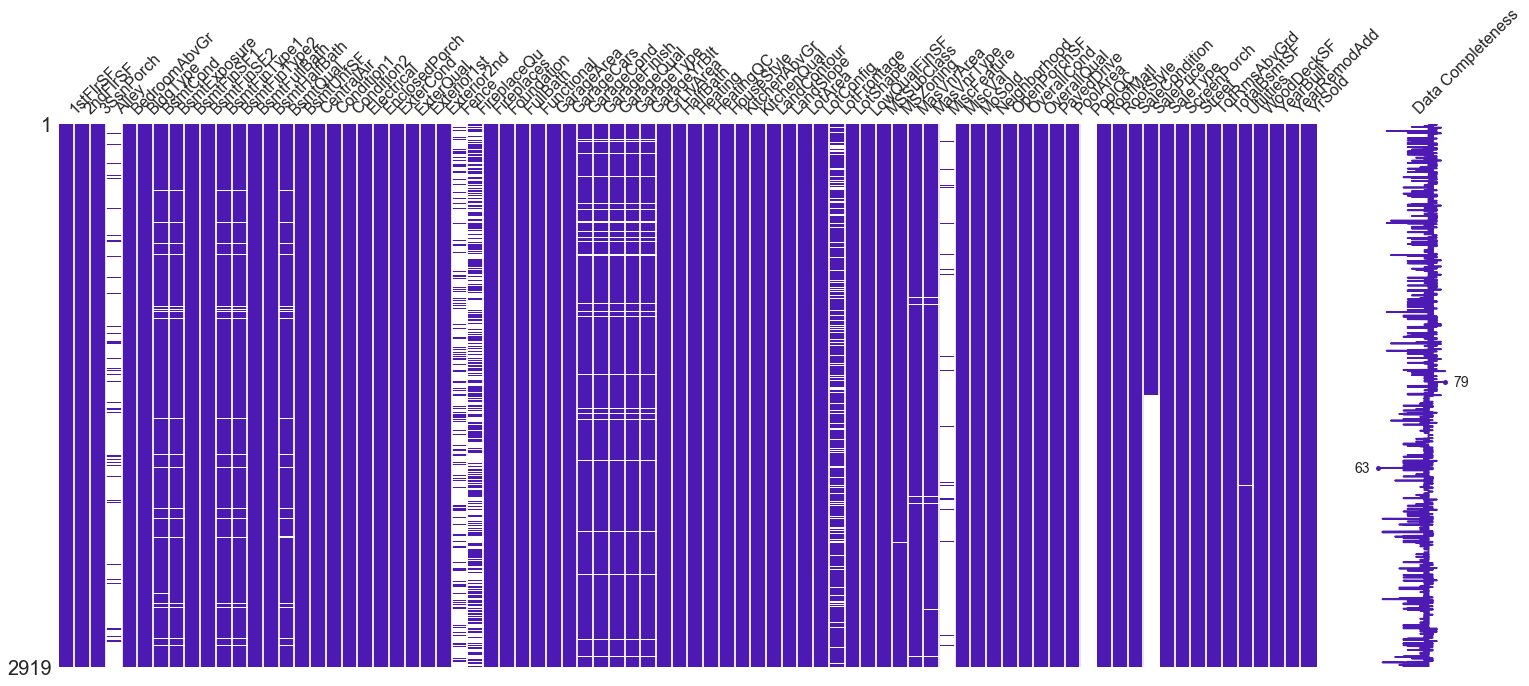

In [14]:
#overall missing data visualization
msno.matrix(totaldf, color=(0.3, 0.1, 0.7), labels = True)


In [15]:
missingcolumns = totalhousing.isnull().sum().sort_values(ascending = False)
missingpercentage = (totalhousing.isnull().sum()/len(totaldf)).sort_values(ascending = False)
missingdf = pd.DataFrame({'missing_column': missingcolumns.index.tolist(), 'missing_numbers': missingcolumns.values.tolist(), 'missing_percentage': missingpercentage.values.tolist()})
missingdf = missingdf[missingdf['missing_numbers']>0]
missingdf



,missing_column,missing_numbers,missing_percentage
0,PoolQC,2909,0.996574
1,MiscFeature,2814,0.964029
2,Alley,2721,0.932169
3,Fence,2348,0.804385
4,FireplaceQu,1420,0.486468
5,LotFrontage,486,0.166495
6,GarageFinish,159,0.054471
7,GarageQual,159,0.054471
8,GarageYrBlt,159,0.054471
9,GarageCond,159,0.054471


In [16]:
#missing data with barplots

missing_counts = go.Bar(x=missingdf['missing_column'].tolist(),
                  y=missingdf['missing_numbers'].tolist(),
                  marker=dict(color='rgb(166,206,227)'))


data = [missing_counts]

layout = go.Layout(title="Missing Data Counts",
                xaxis=dict(title='Missing Columns',tickangle=30),
                yaxis=dict(title='Counts'))

fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)





In [17]:
#missing data with barplots

missing_percentage = go.Bar(x=missingdf['missing_column'].tolist(),
                  y=missingdf['missing_percentage'].tolist(),
                  marker=dict(color='rgb(166,206,227)'))


data = [missing_percentage]

layout = go.Layout(title="Missing Data Percentage",
                xaxis=dict(title='Missing Columns',tickangle=30),
                yaxis=dict(title='Missing Percentage'))

fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)




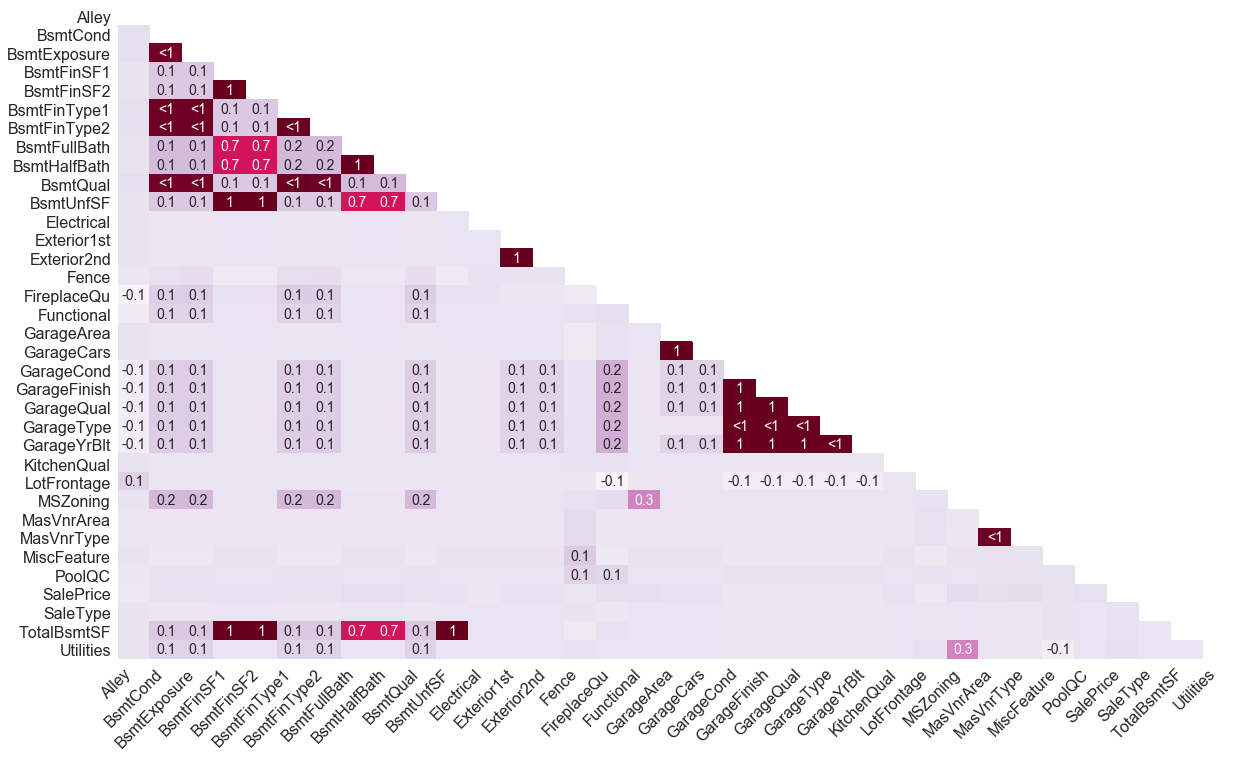

In [18]:
#correlation between missing data
msno.heatmap(totaldf, cmap = 'PuRd')

In [19]:
totaldf.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

In [20]:
totalmissingdf = totaldf[missingdf['missing_column'].tolist()]

## 2.2 Garage Year Imputation

In [21]:
# totalhousing.GarageYrBlt = np.where(totalhousing.GarageYrBlt != totalhousing.GarageYrBlt, totalhousing.YearBuilt, totalhousing.GarageYrBlt)
# Example
# a = np.array([2,2,0,6,8])
# b = np.array([np.nan,3,np.nan,4,5])
# c = np.array([0,0,0,0,0])
# d = np.array([1,1,1,1,1])
# np.where(np.isnan(b), a, b)



In [22]:
totalhousing['HasGarage'] = np.where(np.isnan(totalhousing['GarageYrBlt']), 0, 1)



In [23]:
#some of garage year built are earlier than year built, causing negative numbers, should come back and impute
totalhousing['GarageYearDiff'] = totalhousing['GarageYrBlt'] - totalhousing['YearBuilt']
# totalhousing['GarageYearDiff'] = [0 if math.isnan(i) else i for i in totalhousing['GarageYearDiff']]
totalhousing['GarageYearDiff'] = np.where(np.isnan(totalhousing['GarageYearDiff']), 0, totalhousing['GarageYearDiff'])
totalhousing['GarageYearDiff'] = np.where(totalhousing['GarageYearDiff'] < 0, 0, totalhousing['GarageYearDiff'])
totalhousing['GarageYearDiff'] = np.where(totalhousing['GarageYearDiff'] == 201, 1, totalhousing['GarageYearDiff'])
pd.unique(totalhousing['GarageYearDiff'])




array([   0.,   83.,   62.,   54.,    1.,    2.,   51.,    7.,   15.,
         69.,    5.,   35.,   56.,   14.,   20.,   40.,   48.,   50.,
         12.,   78.,  101.,   17.,    3.,   18.,    4.,   29.,   45.,
         26.,   11.,   53.,   88.,  123.,   21.,   38.,   77.,   44.,
         32.,   22.,   13.,   70.,   85.,   33.,   58.,    6.,    8.,
         27.,   74.,   37.,   95.,   43.,   42.,    9.,   57.,   36.,
         47.,   59.,   99.,   64.,  106.,   24.,   19.,   10.,   34.,
         49.,   41.,   46.,   79.,   31.,   73.,   30.,   87.,   52.,
         72.,   39.,   75.,   60.,   93.,   89.,   98.,   16.,   86.,
         71.,  113.,   55.,   28.,   25.,   65.,   61.,   67.,   68.,
         80.,   23.,  100.,   82.,   91.])

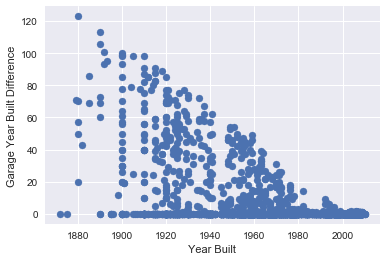

In [24]:
#Visualize garage year imputation
plt.scatter(totalhousing['YearBuilt'], totalhousing['GarageYearDiff'])
plt.xlabel('Year Built')
plt.ylabel('Garage Year Built Difference')
plt.rcParams['figure.figsize'] = (10, 10)




## 2.3 Year Remodeling Imputation

In [25]:
#create a column to check if the remodeled year is equal to year built
totalhousing['IsRemod'] = np.where(totalhousing['YearRemodAdd'] == totalhousing['YearBuilt'], 0, 1)


In [26]:
#create a column to store the year difference between every remodelling year and year built
totalhousing['RemodYearDiff'] = totalhousing['YearRemodAdd'] - totalhousing['YearBuilt']
totalhousing['RemodYearDiff'] = np.where(totalhousing['RemodYearDiff'] < 0, 0, totalhousing['RemodYearDiff'])
pd.unique(totalhousing['RemodYearDiff'])

array([  0,   1,  55,   2,  19,  11,  72,   7,  20,  33,  49,  40,  23,
        30,  36,  54,   5,  88,  16,   6,  76,  29,  24,  35,  53,  71,
        67,  85, 110,  86,  18,  57,  47,  43,  25,  62,  14,  15,  27,
        26,  78,  59,  38,   9,  51,  83, 101,  32,   3,  39,  10,  52,
        50,   8,  48,  79,  58,  82,  17, 122,  65,  34,  75,  60,  42,
        77,  28,  22,  61,  46,  89,  80,  13,  63,  90,  70,  37, 100,
        44,   4,  81, 107,  21,  64, 111,  69,  31,  68,  96, 108,  56,
        92, 123,  94,  45,  87,  41,  74,  98,  12, 103, 106,  93, 104,
        73, 121, 115,  95,  84, 112,  97, 127, 109,  66, 116, 105])

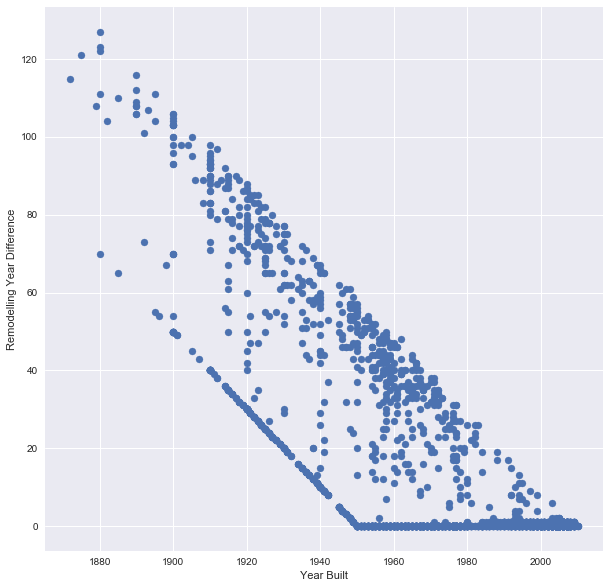

In [27]:
#Visualize year remodeling imputation
plt.scatter(totalhousing['YearBuilt'], totalhousing['RemodYearDiff'])
plt.xlabel('Year Built')
plt.ylabel('Remodelling Year Difference')
plt.rcParams['figure.figsize'] = (10, 10)

## 2.4 Ordinal Variable Imputation

In [28]:
ordinal1 = ["FireplaceQu", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "Fence", 'PoolQC']

In [29]:
totalhousing[ordinal1] = totalhousing[ordinal1] = totalhousing[ordinal1].replace(np.nan, 'None')

In [30]:
ordinal2 = ["LotShape","LandContour", "LandSlope", "BldgType", "OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
           "BsmtFinType2", "HeatingQC", "CentralAir", "KitchenQual", "Functional"]



In [31]:
for i in ordinal2:
    totalhousing[i] = totalhousing[i].fillna(totalhousing[i].mode()[0])

In [32]:
totalhousing[ordinal2].isnull().sum()

LotShape        0
LandContour     0
LandSlope       0
BldgType        0
OverallQual     0
OverallCond     0
ExterQual       0
ExterCond       0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
HeatingQC       0
CentralAir      0
KitchenQual     0
Functional      0
dtype: int64

## 2.5 Nominal Variable Imputation

In [33]:
nominal1 = ['MiscFeature', 'Alley', 'GarageType', 'MasVnrType']


In [34]:
totalhousing[nominal1] = totalhousing[nominal1].replace(np.nan, 'None')

In [35]:
nominal2 = ['MSZoning', 'Utilities', 'SaleType', 'Exterior1st', 'Exterior2nd', 'Electrical']

In [36]:
for i in nominal2:
    totalhousing[i] = totalhousing[i].fillna(totalhousing[i].mode()[0])

In [37]:
totalhousing[nominal2].isnull().sum()

MSZoning       0
Utilities      0
SaleType       0
Exterior1st    0
Exterior2nd    0
Electrical     0
dtype: int64

## 2.6 Continuous Variable Imputation

In [38]:
continuous1 = ['LotFrontage', 'MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'TotalBsmtSF', 'GarageArea', 'GarageCars']



In [39]:
totalhousing[continuous1] = totalhousing[continuous1].fillna(totalhousing[continuous1].median())

## 2.7 Zero Variance and Near-Zero Variance Imputation

In [41]:
zerovariance = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'LowQualFinSF', '3SsnPorch', 'PoolArea', 'PoolQC', 'MiscVal']




In [42]:
totalhousing.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

In [43]:
# drop all zero variance and near-zero variance columns
totalhousing = totalhousing.drop(zerovariance, axis = 1)


In [44]:
#drop yearremodadd and garageyrblt
totalhousing = totalhousing.drop(['YearRemodAdd', 'GarageYrBlt'], axis = 1)

In [45]:
totalhousing.shape

(2919, 72)

In [46]:
totalhousing.isnull().sum().sort_values(ascending = False)

RemodYearDiff     0
IsRemod           0
ExterCond         0
ExterQual         0
Exterior1st       0
Exterior2nd       0
Fence             0
FireplaceQu       0
Fireplaces        0
Foundation        0
FullBath          0
Functional        0
GarageArea        0
GarageCars        0
GarageCond        0
GarageFinish      0
GarageQual        0
EnclosedPorch     0
Electrical        0
Condition1        0
BsmtFinSF1        0
2ndFlrSF          0
Alley             0
BedroomAbvGr      0
BldgType          0
BsmtCond          0
BsmtExposure      0
BsmtFinSF2        0
CentralAir        0
BsmtFinType1      0
                 ..
RoofStyle         0
SaleCondition     0
SaleType          0
TotRmsAbvGrd      0
Neighborhood      0
TotalBsmtSF       0
WoodDeckSF        0
YearBuilt         0
YrSold            0
HasGarage         0
GarageYearDiff    0
OpenPorchSF       0
MoSold            0
Heating           0
LotArea           0
HeatingQC         0
HouseStyle        0
KitchenAbvGr      0
KitchenQual       0


## 2.1 Kaggle Train Test Split

In [47]:
housingtrainx = totalhousing.iloc[0:1460, :]

In [48]:
housingtrain = pd.concat([housingtrainx, housingtrainy], axis = 1)

In [49]:
housingtest = totalhousing.iloc[1460:2919, :].copy()

In [50]:
housingtrain.to_csv('./Datasets/train_Wenchang.csv')

In [51]:
housingtest.to_csv('./Datasets/test_Wenchang.csv')

## 2.2 Statistical Analysis & Visualization

In [52]:
continuous2 = ["LotFrontage", "LotArea", "YearBuilt", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", 
               "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "ScreenPorch", 'MoSold', 'YrSold', 'SalePrice']


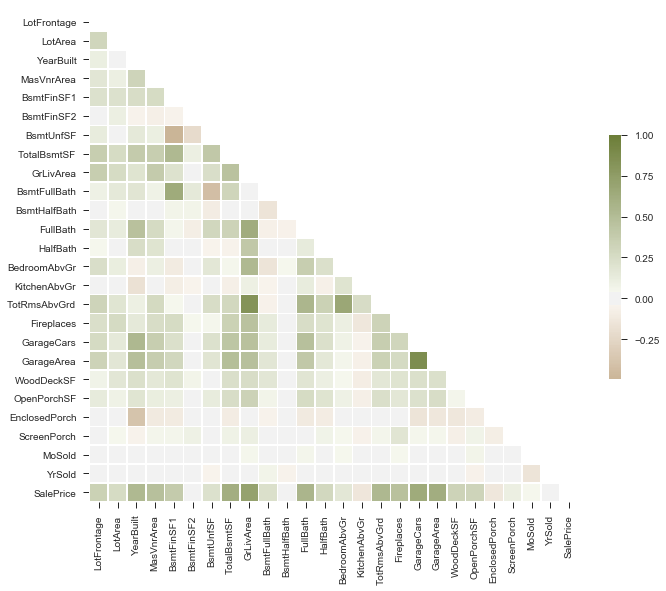

In [53]:
#create a correlation matrix with all numeric columns: Pearson

sns.set(style="ticks")

# take the numerical columns
data1 = pd.DataFrame(data= housingtrain[continuous2],
                 columns = housingtrain[continuous2].columns.tolist())

# Compute the correlation matrix
corr1 = data1.corr(method = 'pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(50, 100, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})




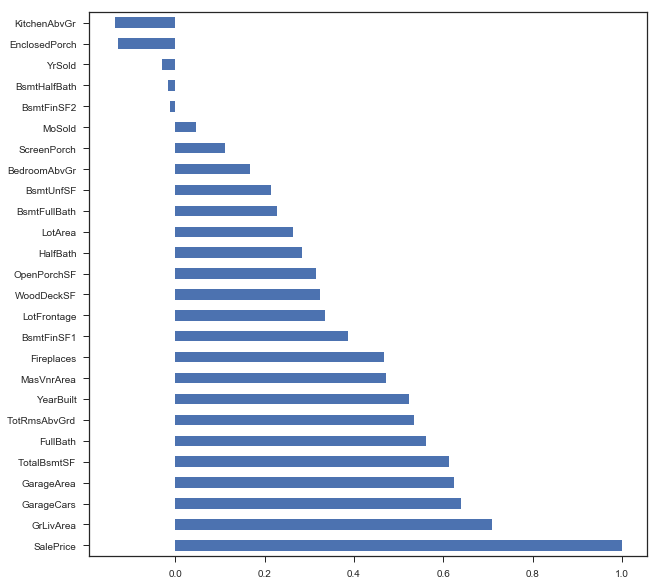

In [54]:
#top10 correlated continuous variables
correlationchart = corr1['SalePrice'].sort_values(ascending = False)
correlationchart.plot.barh()




In [55]:
# ordinal2 = ["LotShape", "LandContour", "LandSlope", "BldgType", 
#             "OverallQual", "OverallCond", "ExterQual", "ExterCond", 
#            "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
#            "BsmtFinType2", "HeatingQC", "CentralAir", "KitchenQual", 
#            "Functional", "FireplaceQu", "GarageFinish", "GarageQual", 
#            "GarageCond", "PavedDrive", "Fence"]

In [56]:
# ordinaldf = housingtrain[ordinal2].copy()


In [57]:
# #Ordinal Variables Correlation Plot: Kendall
# sns.set(style="ticks")

# # take the numerical columns
# data2 = pd.DataFrame(data= housingtrain[ordinal2],
#                  columns=housingtrain[ordinal2].columns.tolist())

# # Compute the correlation matrix
# corr2 = data2.corr(method = 'kendall')

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr2, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(75, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=1, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})





In [58]:
# corr = data.corr(method = 'kendall')
# corr

In [59]:
# #Correlation between Ordinal Variables and Sales Prices: Spearman
# sns.set(style="ticks")

# # take the numerical columns
# data = pd.DataFrame(data= numericdf,
#                  columns=numericdf.columns.tolist())

# # Compute the correlation matrix
# corr = data.corr(method = 'spearman')

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(100, 125, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})





In [60]:
housingtrain.describe()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,...,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YrSold,HasGarage,GarageYearDiff,IsRemod,RemodYearDiff,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,346.992466,2.866438,443.639726,46.549315,0.425342,0.057534,567.240411,21.954110,0.613014,...,6.517808,1057.429452,94.244521,1971.267808,2007.815753,0.944521,5.265753,0.476712,13.597945,180921.195890
std,386.587738,436.528436,0.815778,456.098091,161.319273,0.518911,0.238753,441.866955,61.119149,0.644666,...,1.625393,438.705324,125.338794,30.202904,1.328095,0.228992,16.150061,0.499629,24.476465,79442.502883
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,1872.000000,2006.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,882.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,223.000000,0.000000,0.000000,...,5.000000,795.750000,0.000000,1954.000000,2007.000000,1.000000,0.000000,0.000000,0.000000,129975.000000
50%,1087.000000,0.000000,3.000000,383.500000,0.000000,0.000000,0.000000,477.500000,0.000000,1.000000,...,6.000000,991.500000,0.000000,1973.000000,2008.000000,1.000000,0.000000,0.000000,0.000000,163000.000000
75%,1391.250000,728.000000,3.000000,712.250000,0.000000,1.000000,0.000000,808.000000,0.000000,1.000000,...,7.000000,1298.250000,168.000000,2000.000000,2009.000000,1.000000,0.000000,1.000000,20.000000,214000.000000
max,4692.000000,2065.000000,8.000000,5644.000000,1474.000000,3.000000,2.000000,2336.000000,552.000000,3.000000,...,14.000000,6110.000000,857.000000,2010.000000,2010.000000,1.000000,123.000000,1.000000,123.000000,755000.000000


In [61]:
#Boxplot with Median Price and Neighborhoods

N = len(pd.unique(housingtrain.Neighborhood))     # Number of boxes

# generate an array of rainbow colors by fixing the saturation and lightness of the HSL representation of colour 
# and marching around the hue. 

c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

#loading the data with filters
data = [{
    'y': housingtrain.SalePrice[housingtrain.Neighborhood == j],
    'name': j,
    'type':'box',
    'marker':{'color': c[i]}
    } for i, j in enumerate(pd.unique(housingtrain.Neighborhood))]


# format the layout
layout = go.Layout(title="Housing Sale Price by Neighborhoods",
                xaxis=dict(title='Neighborhood'),
                yaxis=dict(title='Housing Sale Price'))


fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)


In [62]:
#Boxplot with Price and Overall Quality

N = len(pd.unique(housingtrain.OverallQual))     # Number of boxes

# generate an array of rainbow colors by fixing the saturation and lightness of the HSL representation of colour 
# and marching around the hue. 

c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

#loading the data with filters
data = [{
    'y': housingtrain.SalePrice[housingtrain.OverallQual == j],
    'name': j,
    'type':'box',
    'marker':{'color': c[i]}
    } for i, j in enumerate(pd.unique(housingtrain.OverallQual))]


# format the layout
layout = go.Layout(title="Housing Sale Price by Overall Quality",
                xaxis=dict(title='Overall Quality'),
                yaxis=dict(title='Housing Sale Price'))


fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)


In [63]:
from datetime import datetime
saletime = housingtrain.copy()
saletime['Saletime'] = saletime['YrSold'].map(str) + '/' + saletime['MoSold'].map(str) 
saletime['Saletime'] = pd.to_datetime(saletime['Saletime'], format = '%Y/%m')
saletimedf = pd.concat([saletime['Saletime'], saletime['SalePrice']], axis = 1)
saletimedf = saletimedf.sort_values(by = 'Saletime')
saletimedf.Saletime = saletimedf.Saletime.map(lambda x: x.strftime('%Y/%m'))
pd.unique(saletimedf.Saletime)

array(['2006/01', '2006/02', '2006/03', '2006/04', '2006/05', '2006/06',
       '2006/07', '2006/08', '2006/09', '2006/10', '2006/11', '2006/12',
       '2007/01', '2007/02', '2007/03', '2007/04', '2007/05', '2007/06',
       '2007/07', '2007/08', '2007/09', '2007/10', '2007/11', '2007/12',
       '2008/01', '2008/02', '2008/03', '2008/04', '2008/05', '2008/06',
       '2008/07', '2008/08', '2008/09', '2008/10', '2008/11', '2008/12',
       '2009/01', '2009/02', '2009/03', '2009/04', '2009/05', '2009/06',
       '2009/07', '2009/08', '2009/09', '2009/10', '2009/11', '2009/12',
       '2010/01', '2010/02', '2010/03', '2010/04', '2010/05', '2010/06',
       '2010/07'], dtype=object)

In [64]:
#Boxplot with Price and Time

N = len(pd.unique(saletimedf.Saletime))     # Number of boxes
enumeratelist = pd.unique(saletimedf.Saletime)


# generate an array of rainbow colors by fixing the saturation and lightness of the HSL representation of colour 
# and marching around the hue. 

c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

#loading the data with filters
data = [{
    'y': saletimedf.SalePrice[saletimedf.Saletime == j],
    'name': j,
    'type':'box',
    'marker':{'color': c[i]}
    } for i, j in enumerate(enumeratelist)]


# format the layout
layout = go.Layout(title="Housing Sale Price by Year",
                xaxis=dict(title='Time'),
                yaxis=dict(title='Housing Sale Price'))


fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)



In [65]:
# #Median Price with Time
# saletimegroup = saletimedf.groupby('Saletime').median()
# saletimegroup.sort(by = 'Saletime')
# sorted(pd.unique(saletime.dt.date))

## 2.3 Feature Engineering



In [66]:
totalhousing.HalfBath = np.where(totalhousing.HalfBath == 0, np.median(totalhousing.HalfBath), totalhousing.HalfBath)
totalhousing.FullBath = np.where(totalhousing.FullBath == 0, np.median(totalhousing.FullBath), totalhousing.FullBath)
totalhousing.BedroomAbvGr = np.where(totalhousing.BedroomAbvGr == 0, np.median(totalhousing.BedroomAbvGr), totalhousing.BedroomAbvGr)




In [67]:
# bathroomratio = bath/room
totalhousing['Bath_Capacitance'] = (totalhousing['FullBath']+totalhousing['HalfBath']) /totalhousing['BedroomAbvGr']


In [68]:
#garageroomratio = garage/room
totalhousing['Parking_Capacitance']=totalhousing.GarageCars/totalhousing.BedroomAbvGr


In [69]:
housingtrain.columns

Index(['1stFlrSF', '2ndFlrSF', 'Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'Condition1', 'Electrical', 'EnclosedPorch', 'ExterCond',
       'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu',
       'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle',
       'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea',
       'LotConfig', 'LotFrontage', 'LotShape', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MoSold', 'Neighborhood',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'RoofStyle',
       'SaleCondition', 'SaleType', 'ScreenPorch', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'W

In [70]:
# housingtest.HalfBath = np.where(housingtest.HalfBath == 0, np.median(housingtest.HalfBath), housingtest.HalfBath)
# housingtest.FullBath = np.where(housingtest.FullBath == 0, np.median(housingtest.FullBath), housingtest.FullBath)
# housingtest.BedroomAbvGr = np.where(housingtest.BedroomAbvGr == 0, np.median(housingtest.BedroomAbvGr), housingtest.BedroomAbvGr)
# bathroomratio = bath/room
# housingtest['Bath_Capacitance'] = (housingtest['FullBath']+housingtest['HalfBath']) /housingtest['BedroomAbvGr']
# #garageroomratio = garage/room
# housingtest['Parking_Capacitance']=housingtest.GarageCars/housingtest.BedroomAbvGr




In [71]:
#landscape = lotshape * land contour
# housingtrain['landscape']


In [72]:
#saletype score



In [73]:
#neighborhood score



In [74]:
from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline



In [75]:
from scipy.stats import skew
skew0 = 0.6
housingmodel = totalhousing.copy()
housingx = housingmodel.loc[:, housingmodel.columns != 'SalePrice']
numeric_features = housingx.dtypes[housingx.dtypes != "object"].index
skewed_features = housingmodel[numeric_features].apply(lambda x: skew(x))
skewed_features = skewed_features[abs(skewed_features)>skew0]
housingmodel[skewed_features.index] = np.log1p(housingmodel[skewed_features.index])  




In [76]:
housingmodel = pd.get_dummies(housingmodel, drop_first = True, dummy_na = True)


In [77]:
housingtrainx = housingmodel.iloc[0:1460, :]

In [78]:
housingtrainx.to_csv('./Datasets/stack_trainx.csv', index = False)

In [79]:
housingtrainy.to_csv('./Datasets/stack_trainy.csv', index = False)

In [80]:
housingtrain = pd.concat([housingtrainx, housingtrainy], axis = 1)

In [81]:
housingtest = housingmodel.iloc[1460:2919, :].copy()

In [83]:
housingtest.to_csv('./Datasets/stack_testx.csv', index = False)

## Modelling



## 4.1 Principle Component Regression

In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1.2) #adopting James' convention

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pylab 
import scipy.stats as stats

from scipy.stats import skew
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import cross_val_score

In [219]:
# # Read in train and test sets
# train = pd.read_csv('Datasets/train_Wenchang.csv')
# test = pd.read_csv('Datasets/test_Wenchang.csv')

In [220]:
# #following James's approach 
# # Concat. train[no ID column, ... (all columns) ..., no SalePrice column]
# #     with test[no ID column, ... (all columns) ..., no SalePrice column]
# # (Test data has no SalePrice column anyway)
# # we will log xform overly skewed variables

# train_test = pd.concat([train.loc[:,'MSSubClass':'SaleCondition'],
#                          test.loc[:,'MSSubClass':'SaleCondition']]);

# train_test.shape

# # deal with skew through log x-formation, add one to argument
# train.SalePrice = np.log(1 + train.SalePrice)

# # we have selected a skew value of 0.6 to be our threshold 

# # Likewise, log transform those skewed numeric features
# from scipy.stats import skew

# # Set the threshold for being over-skewed
# # (can tune later)
# skew0 = 0.6;
# numeric_features = train_test.dtypes[train_test.dtypes != "object"].index

# skewed_features = train[numeric_features].apply(lambda x: skew(x.dropna())) 
# skewed_features = skewed_features[abs( skewed_features ) > skew0]
# skewed_features = skewed_features.index
# train_test[skewed_features] = np.log(1 + train_test[skewed_features])




In [221]:
# train_test = pd.get_dummies(train_test)
# # filling in NAs - we agreed to impute w/ median
# #save copy of data 
# train_test.to_csv('./Datasets/train_test.csv')

In [222]:
# X_train = train_test[:train.shape[0]].reset_index(drop = True)
# X_test  = train_test[train.shape[0]:]
# Y_train = train.SalePrice

In [223]:
# X_train.head()

In [224]:
# X_train.max()
# X_train.isnull().values.any()

In [390]:
housingpca = housingtrain.copy()
housingpca

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SalePrice
0,6.753438,6.751101,3.0,6.561031,0.000000,0.693147,0.000000,5.017280,0.000000,0.000000,...,0,0,0,0,0,0,0,1,0,208500
1,7.141245,0.000000,3.0,6.886532,0.000000,0.000000,0.693147,5.652489,0.000000,0.693147,...,0,0,0,0,0,0,0,1,0,181500
2,6.825460,6.765039,3.0,6.188264,0.000000,0.693147,0.000000,6.075346,0.000000,0.693147,...,0,0,0,0,0,0,0,1,0,223500
3,6.869014,6.629363,3.0,5.379897,0.000000,0.693147,0.000000,6.293419,5.609472,0.693147,...,0,0,0,0,0,0,0,1,0,140000
4,7.044033,6.960348,4.0,6.486161,0.000000,0.693147,0.000000,6.196444,0.000000,0.693147,...,0,0,0,0,0,0,0,1,0,250000
5,6.680855,6.340359,1.0,6.597146,0.000000,0.693147,0.000000,4.174387,0.000000,0.000000,...,0,0,0,0,0,0,0,1,0,143000
6,7.435438,0.000000,3.0,7.222566,0.000000,0.693147,0.000000,5.762051,0.000000,0.693147,...,0,0,0,0,0,0,0,1,0,307000
7,7.010312,6.891626,3.0,6.756932,3.496508,0.693147,0.000000,5.379897,5.433722,1.098612,...,0,0,0,0,0,0,0,1,0,200000
8,6.930495,6.624065,2.0,0.000000,0.000000,0.000000,0.000000,6.859615,5.327876,1.098612,...,0,0,0,0,0,0,0,1,0,129900
9,6.982863,0.000000,2.0,6.747587,0.000000,0.693147,0.000000,4.948760,0.000000,1.098612,...,0,0,0,0,0,0,0,1,0,118000


In [391]:
import sklearn.model_selection as ms

x_train_, x_test, y_train, y_test = ms.train_test_split(housingpca.loc[:, housingpca.columns != 'SalePrice'], housingpca['SalePrice'], 
                                                       test_size=1/8, random_state=0)

print('Original: {}, {}'.format(housingpca.shape, housingpca.shape))
print('Training: {}, {}'.format(x_train.shape, y_train.shape))
print('Test: {}, {}'.format(x_test.shape, y_test.shape))




Original: (1460, 274), (1460, 274)
Training: (1277, 273), (1277,)
Test: (183, 273), (183,)


In [392]:
#log transform the sale prices
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)



In [393]:
X_pca = RobustScaler().fit_transform(x_train)

In [394]:
type(X_pca)

numpy.ndarray

In [395]:
np.size(X_pca,1)

273

In [396]:
pca = PCA(n_components=30).fit(X_pca)

X_pca = pca.transform(X_pca)

In [397]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

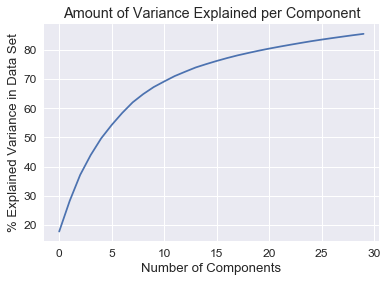

In [398]:
plt.plot(var)
plt.ylabel('% Explained Variance in Data Set')
plt.xlabel('Number of Components')
plt.title('Amount of Variance Explained per Component')
plt.show()

In [399]:
x_train.keys()

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch',
       'Fireplaces',
       ...
       'SaleCondition_nan', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleType_nan'],
      dtype='object', length=273)

In [400]:
pca.explained_variance_ratio_

array([ 0.1782105 ,  0.10467519,  0.08907315,  0.06778487,  0.05722009,
        0.04578997,  0.04099237,  0.03638198,  0.02822935,  0.02408512,
        0.01924761,  0.01835578,  0.01498734,  0.01450575,  0.01153248,
        0.01077092,  0.00997465,  0.00915589,  0.00808416,  0.00783507,
        0.00716337,  0.00668476,  0.00642461,  0.00624931,  0.00600623,
        0.00547394,  0.00524903,  0.00504497,  0.00488329,  0.0046461 ])

In [401]:
def component_results(data, pca):
    modes = ['Mode {}'.format(i) for i in range(1,len(pca.components_) + 1)]
    components = pd.DataFrame(np.round(pca.components_,4), columns = data.keys())
    components.index = modes
    # variance explained
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = modes
    
    # too many modes currently for plot to be useful
    # Plot the feature weights as a function of the components
    # components.plot(ax = ax, kind = 'bar')
    # ax.set_ylabel("Feature Weights") 
    # ax.set_xticklabels(modes, rotation=0)
    
    # Display the explained variance ratios# 
    # for i, ev in enumerate(pca.explained_variance_ratio_): 
        # ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))
    
    # Display the explained variance ratios
    # for i, ev in enumerate(pca.explained_variance_ratio_): 
        # ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))
    
    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

In [402]:
componentresults = component_results(x_train, pca)

In [403]:
componentresults.to_csv('./Datasets/eigenvectors.csv')

In [404]:
componentresults.iloc[0:30,0].cumsum()

Mode 1     0.1782
Mode 2     0.2829
Mode 3     0.3720
Mode 4     0.4398
Mode 5     0.4970
Mode 6     0.5428
Mode 7     0.5838
Mode 8     0.6202
Mode 9     0.6484
Mode 10    0.6725
Mode 11    0.6917
Mode 12    0.7101
Mode 13    0.7251
Mode 14    0.7396
Mode 15    0.7511
Mode 16    0.7619
Mode 17    0.7719
Mode 18    0.7811
Mode 19    0.7892
Mode 20    0.7970
Mode 21    0.8042
Mode 22    0.8109
Mode 23    0.8173
Mode 24    0.8235
Mode 25    0.8295
Mode 26    0.8350
Mode 27    0.8402
Mode 28    0.8452
Mode 29    0.8501
Mode 30    0.8547
Name: Explained Variance, dtype: float64

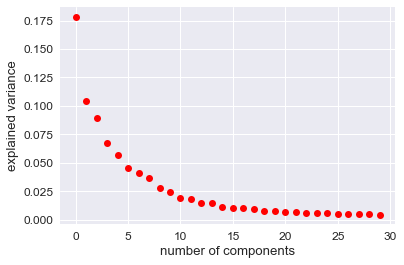

In [405]:
#Explained variance
plt.plot(pca.explained_variance_ratio_, 'ro')
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [406]:
pca.components_

array([[-0.12810738, -0.0001555 , -0.02247669, ...,  0.00033396,
         0.02653781, -0.        ],
       [ 0.04365059,  0.00936228, -0.03540662, ..., -0.00032256,
        -0.02374057,  0.        ],
       [ 0.08842261, -0.05561915, -0.00733979, ..., -0.00015867,
         0.00685138, -0.        ],
       ..., 
       [-0.08894806,  0.01052441,  0.03535031, ..., -0.00033982,
         0.05639941, -0.        ],
       [-0.03998456,  0.01205618, -0.07581377, ...,  0.00439654,
        -0.08895846,  0.        ],
       [-0.06451029, -0.0070415 ,  0.08427852, ..., -0.0032955 ,
         0.01578659, -0.        ]])

Now, let's try to apply Linear, Ridge, and Lasso Models

In [407]:
# develop test of rmse to compare across models

def rmse_cv(model):
    rmse = np.sqrt( -cross_val_score(model, X_pca, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)



In [408]:
houseRegr = LinearRegression()

In [409]:
houseRegr.fit(X_pca, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [410]:
hept_Y_pred = houseRegr.predict(X_pca)

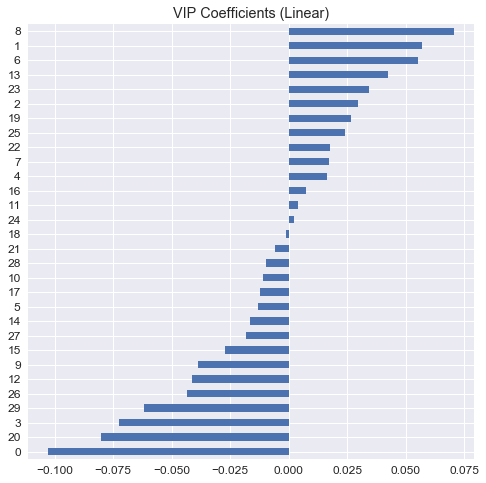

In [411]:
model_lin = houseRegr.fit(X_pca, y_train);
coeffs_lin = pd.Series(model_lin.coef_, index = X_pca.dtype.names);
vip_coeffs_lin = pd.concat([coeffs_lin.sort_values().head(15),
                              coeffs_lin.sort_values().tail(15)])

fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_lin.plot(kind = "barh");
plt.title("VIP Coefficients (Linear)");

**************************************************
Ridge Performace: R^2 = 0.8794
**************************************************


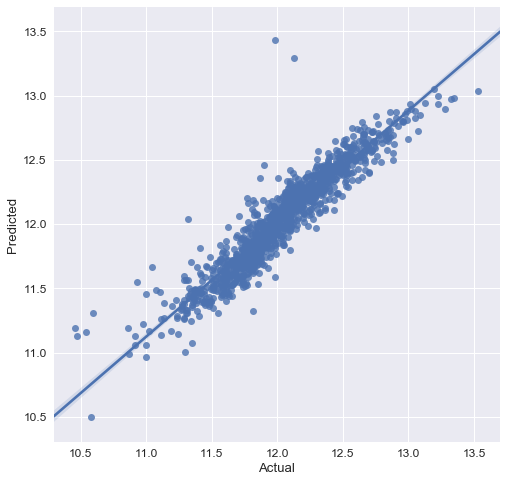

In [412]:
predictions_lin = pd.DataFrame({"Predicted":model_lin.predict(X_pca), 
                                  "Actual":y_train});
predictions_lin["Residual"] = predictions_lin.Actual - predictions_lin.Predicted;


print('*'*50)
print('Ridge Performace: R^2 = {:.4f}'.format(model_lin.score(X_pca, y_train)))
print('*'*50)


fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_lin.Actual, predictions_lin.Predicted);

In [413]:
model_Ridge = Ridge()

In [414]:
# keeping parameters same as James
# supply a log-ranged alphas from 10^(-2) to 10^(2)
# total: 60 alphas to do CV
alpha_array = np.logspace(-1,2,64)

cv_Ridge = [rmse_cv(Ridge(alpha = Alpha)).mean() for Alpha in alpha_array]

**************************************************
Ridge CV:
Minumum RMSE 0.1436 
achieved at alpha = 17.3020
**************************************************


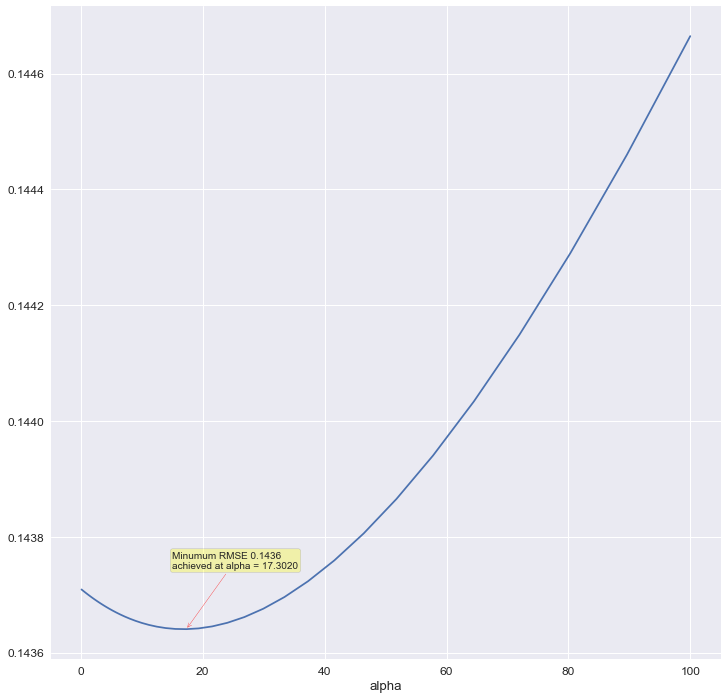

In [415]:
cv_Ridge = pd.Series(cv_Ridge, index = alpha_array)

fig, ax = plt.subplots(figsize=(12,12));
ax.plot(alpha_array,cv_Ridge);
ax.set_xlabel('alpha')
#ax.set_ylabel('RMSE')
alpha0 = cv_Ridge[cv_Ridge == cv_Ridge.min()].index[0];
rmse0 = cv_Ridge.min();
s = 'Minumum RMSE {:.4f} \nachieved at alpha = {:.4f}'.format(rmse0,alpha0)
ax.annotate(s, xy=(alpha0, rmse0),
               xycoords='data',
               xytext=(alpha_array.mean(), cv_Ridge.mean()),
               #textcoords='offset points',
               bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
               arrowprops=dict(arrowstyle='->',color='red'))

print('*'*50)
print('Ridge CV:')
print(s)
print('*'*50)

In [416]:
len(X_pca)

1277

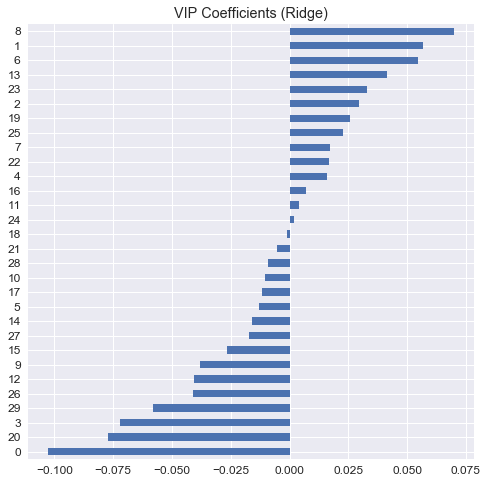

In [417]:
model_Ridge = Ridge(alpha0).fit(X_pca, y_train);
coeffs_Ridge = pd.Series(model_Ridge.coef_, index = X_pca.dtype.names);
vip_coeffs_Ridge = pd.concat([coeffs_Ridge.sort_values().head(15),
                              coeffs_Ridge.sort_values().tail(15)])

fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_Ridge.plot(kind = "barh");
plt.title("VIP Coefficients (Ridge)");

**************************************************
Ridge Performace: R^2 = 0.8793
**************************************************


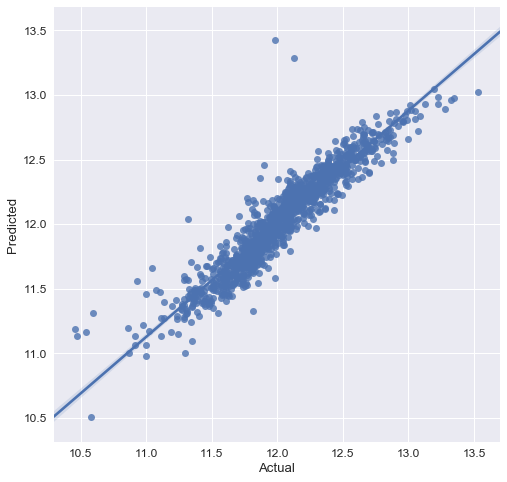

In [418]:
predictions_Ridge = pd.DataFrame({"Predicted":model_Ridge.predict(X_pca), 
                                  "Actual":y_train});
predictions_Ridge["Residual"] = predictions_Ridge.Actual - predictions_Ridge.Predicted;


print('*'*50)
print('Ridge Performace: R^2 = {:.4f}'.format(model_Ridge.score(X_pca, y_train)))
print('*'*50)


fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_Ridge.Actual, predictions_Ridge.Predicted);

In [419]:
model_Lasso = Lasso()
# supply a log-ranged alphas from 10^(-2) to 10^(2)
# total: 60 alphas to do CV
alpha_array = np.logspace(-4,-2,256)

cv_Lasso = [rmse_cv(Lasso(alpha = Alpha)).mean() for Alpha in alpha_array]

In [420]:
len(y_train)

1277

In [275]:
cv_Lasso = pd.Series(cv_Lasso, index = alpha_array)

fig, ax = plt.subplots(figsize=(8,8));
ax.loglog(alpha_array,cv_Lasso);
plt.grid(True);

alpha0 = cv_Lasso[cv_Lasso == cv_Lasso.min()].index[0];
rmse0 = cv_Lasso.min();
s = 'Minumum RMSE {:.4f} \nachieved at alpha = {:.4f}'.format(rmse0,alpha0)
ax.annotate(s, xy=(alpha0, rmse0),
               xycoords='data',
               xytext=(0.0001, 0.198),
               #textcoords='offset points',
               bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
               arrowprops=dict(arrowstyle='->',color='red'))

print('*'*50)
print('Lasso CV:')
print(s)
print('*'*50)

**************************************************
Lasso CV:
Minumum RMSE 35215.0126 
achieved at alpha = 0.0100
**************************************************


ValueError: Image size of 460x-900722430 pixels is too large. It must be less than 2^16 in each direction.

In [276]:
model_Lasso = Lasso(alpha0).fit(X_pca, y_train);


coeffs_Lasso = pd.Series(model_Lasso.coef_, index = X_pca.dtype.names);
vip_coeffs_Lasso = pd.concat([coeffs_Lasso.sort_values().head(10),
                              coeffs_Lasso.sort_values().tail(10)])

fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_Lasso.plot(kind = "barh");
plt.title("VIP Coefficients (Lasso)");

NameError: name 'Y_train' is not defined

In [277]:
predictions_Lasso = pd.DataFrame({"Predicted":model_Lasso.predict(X_pca), 
                                  "Actual":y_train});
predictions_Lasso["Residual"] = predictions_Lasso.Actual - predictions_Lasso.Predicted;


print('*'*50)
print('Lasso Performace: R^2 = {:.4f}'.format(model_Lasso.score(X_pca, y_train)))
print('*'*50)


fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_Lasso.Actual, predictions_Lasso.Predicted);
#ax.set_title('')

NotFittedError: This Lasso instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

Let's try elastic net

In [40]:
l1_search = np.arange(0.005, 1, step = 0.005)
model_elasticGrid = ElasticNetCV(l1_ratio = l1_search, n_alphas=100, cv =10).fit(X_pca, Y_train);

In [41]:
model_elasticGrid.score(X_pca, Y_train)

0.7695332425052568

In [42]:
rmse_cv(model_elasticGrid).min()

0.1808971303692658

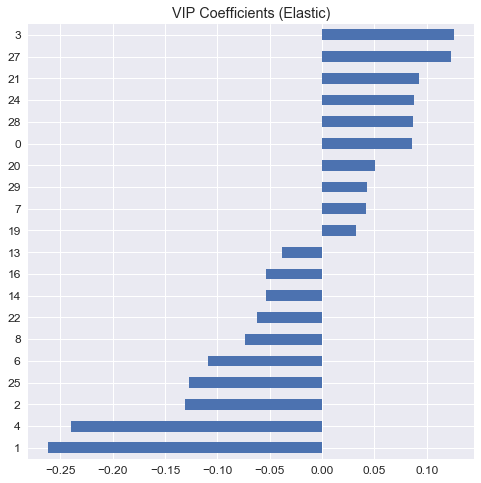

In [43]:
model_elasticGrid = ElasticNetCV(l1_ratio = l1_search, n_alphas=100, cv =10).fit(X_pca, Y_train);


coeffs_elastic = pd.Series(model_elasticGrid.coef_, index = X_pca.dtype.names);
vip_coeffs_elastic = pd.concat([coeffs_elastic.sort_values().head(10),
                              coeffs_elastic.sort_values().tail(10)])

fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_Lasso.plot(kind = "barh");
plt.title("VIP Coefficients (Elastic)");

**************************************************
Elastic Performace: R^2 = 0.7695
**************************************************


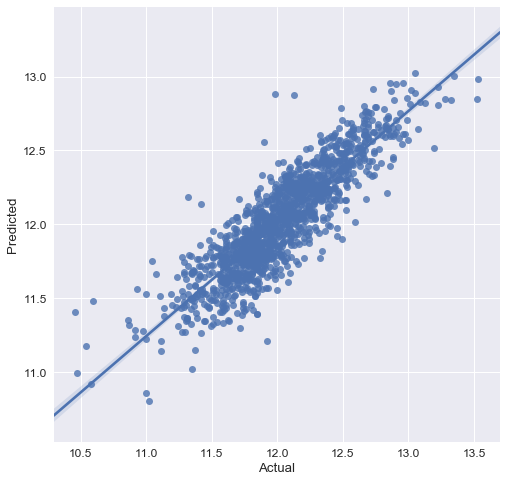

In [44]:
predictions_elastic = pd.DataFrame({"Predicted":model_elasticGrid.predict(X_pca), 
                                  "Actual":Y_train});
predictions_elastic["Residual"] = predictions_elastic.Actual - predictions_elastic.Predicted;


print('*'*50)
print('Elastic Performace: R^2 = {:.4f}'.format(model_elasticGrid.score(X_pca, Y_train)))
print('*'*50)


fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_elastic.Actual, predictions_elastic.Predicted);
#ax.set_title('')

Elastic has lower RMSE than either Ridge or Lasso, but R^2 is the same as Lasso and less than Ridge. 
VIP coefficients indistinguishable from Ridge

Now on to interpreting eigenmodes

In [49]:
component_results.iloc[3].sort_values()

MSZoning_RL             -0.3146
Neighborhood_NAmes      -0.2563
RoofStyle_Hip           -0.2212
MasVnrType_BrkFace      -0.1718
MasVnrArea              -0.1404
MoSold                  -0.0729
SaleCondition_Normal    -0.0654
Neighborhood_Sawyer     -0.0615
Neighborhood_Edwards    -0.0393
PavedDrive_Y            -0.0378
Neighborhood_NWAmes     -0.0343
MiscFeature_Shed        -0.0213
MasVnrType_BrkCmn       -0.0170
Neighborhood_Timber     -0.0105
Neighborhood_Mitchel    -0.0103
RoofStyle_Flat          -0.0074
SaleCondition_Abnorml   -0.0061
Neighborhood_ClearCr    -0.0027
MSZoning_C (all)        -0.0022
RoofStyle_Mansard       -0.0016
MiscFeature_Gar2        -0.0015
SaleCondition_AdjLand   -0.0008
SaleCondition_Family    -0.0007
RoofStyle_Shed          -0.0000
MiscFeature_Othr        -0.0000
MiscFeature_TenC         0.0001
SaleCondition_Alloca     0.0007
RoofStyle_Gambrel        0.0008
Neighborhood_Crawfor     0.0014
Neighborhood_CollgCr     0.0023
                          ...  
Neighbor

In [ ]:
components = component_results.T.sort_values(by = 'Mode 2')

In [ ]:
components.drop(['Explained Variance'], inplace = True)

In [ ]:
components.iloc[:,1]

In [ ]:
round(sum(list(map(lambda x: x**2, components.iloc[:,0]))))

## 4.2 Regularized Linear Regression: Ridge 

## Preprocessing



In [278]:
from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline



## 3.2 Encoding

In [283]:
#we create a private train set and a private test set within the kaggle train set in order to
#find best regularization parameter only based on private train set. 
privateset = housingtrain.copy()

## 3.2 Private Train Test Split

In [284]:
import sklearn.model_selection as ms

x_train, x_test, y_train, y_test = ms.train_test_split(privateset.loc[:, privateset.columns != 'SalePrice'], privateset['SalePrice'], 
                                                       test_size=1/8, random_state=0)

print('Original: {}, {}'.format(privateset.shape, privateset.shape))
print('Training: {}, {}'.format(x_train.shape, y_train.shape))
print('Test: {}, {}'.format(x_test.shape, y_test.shape))




Original: (1460, 274), (1460, 274)
Training: (1277, 273), (1277,)
Test: (183, 273), (183,)


In [285]:
#log transform the sale prices
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)



In [286]:
def rmse_cv(model):
    n_folds = 5
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train)
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

def rmse(residuals):
    return np.sqrt(np.sum(residuals**2)/(len(residuals)))

In [287]:
from sklearn.linear_model import Ridge
from sklearn.grid_search import GridSearchCV
ridge = Ridge()

In [288]:
# alpha_100 = np.logspace(-2, 5, 100)
# ridge_grid_search = GridSearchCV(estimator = ridge, param_grid = {'alpha': alpha_100}, cv = 5, verbose = 2, scoring = 'neg_mean_squared_error')
# ridge_fit = ridge_grid_search.fit(x_train, y_train)
# best_param = ridge_grid_search.best_params_
# score = np.sqrt(-ridge_grid_search.best_score_)
# ran = ridge_grid_search.best_estimator_
# error = rmse(ran.predict(x_test)-y_test)

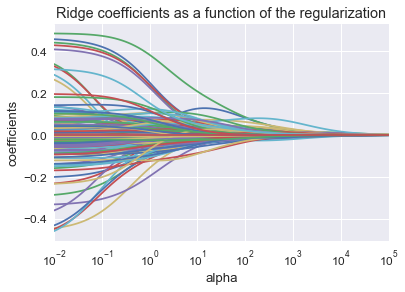

In [289]:
alpha_100 = np.logspace(-2, 5, 100)
coef = []

for i in alpha_100:
    ridge.set_params(alpha = i)
    ridge.fit(x_train, y_train)
    coef.append(ridge.coef_)

columns = x_train.columns
df_coef = pd.DataFrame(coef, index=alpha_100, columns=columns)
title = 'Ridge coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title, legend = False)

plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()


In [290]:
cv_Ridge = [rmse_cv(Ridge(alpha = Alpha)).mean() for Alpha in alpha_100]

**************************************************
Ridge CV:
Minumum RMSE 0.1303 
achieved at alpha = 9.3260
**************************************************


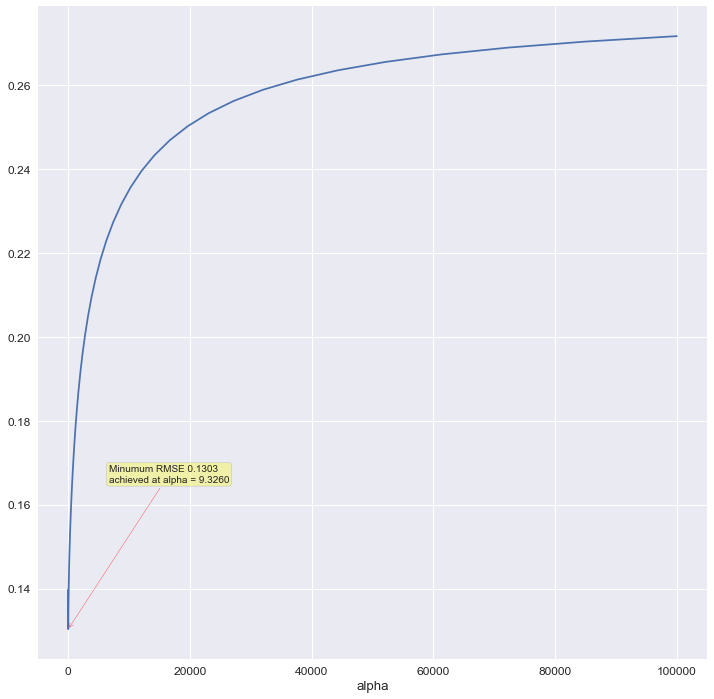

In [291]:
cv_Ridge = pd.Series(cv_Ridge, index = alpha_100)

fig, ax = plt.subplots(figsize=(12,12));
ax.plot(alpha_100,cv_Ridge);
ax.set_xlabel('alpha')
#ax.set_ylabel('RMSE')
alpha0 = cv_Ridge[cv_Ridge == cv_Ridge.min()].index[0];
rmse0 = cv_Ridge.min();
s = 'Minumum RMSE {:.4f} \nachieved at alpha = {:.4f}'.format(rmse0,alpha0)
ax.annotate(s, xy=(alpha0, rmse0),
               xycoords='data',
               xytext=(alpha_100.mean(), cv_Ridge.mean()),
               #textcoords='offset points',
               bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
               arrowprops=dict(arrowstyle='->',color='red'))

print('*'*50)
print('Ridge CV:')
print(s)
print('*'*50)



In [292]:
# ridgemodel = make_pipeline(preprocessing.StandardScaler(), Ridge(alpha =0.0005, random_state=1))

In [293]:
# score = rmse_cv(ridgemodel)
# print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

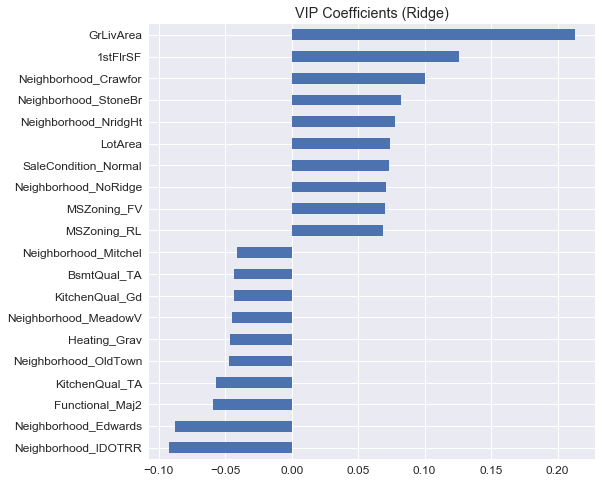

In [294]:
model_Ridge = Ridge(alpha0).fit(x_train, y_train);

coeffs_Ridge = pd.Series(model_Ridge.coef_, index = x_train.columns);
vip_coeffs_Ridge = pd.concat([coeffs_Ridge.sort_values().head(10),
                              coeffs_Ridge.sort_values().tail(10)])

fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_Ridge.plot(kind = "barh");
plt.title("VIP Coefficients (Ridge)");

**************************************************
Ridge Performace: R^2 = 0.8975
**************************************************
Ridge Performace: RMSE = 0.1161
**************************************************


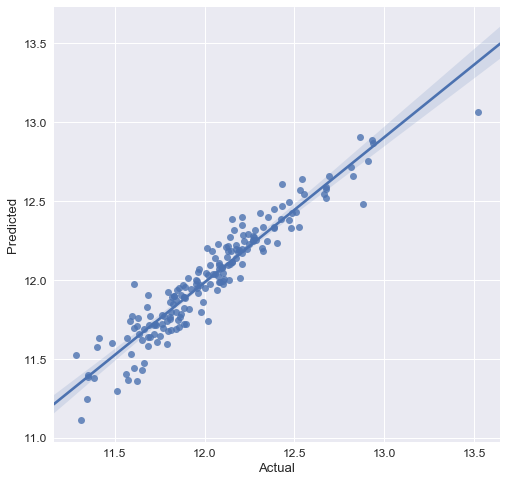

In [295]:
predictions_Ridge = pd.DataFrame({"Predicted":model_Ridge.predict(x_test), 
                                  "Actual":y_test});
predictions_Ridge["Residual"] = predictions_Ridge.Actual - predictions_Ridge.Predicted;


print('*'*50)
print('Ridge Performace: R^2 = {:.4f}'.format(model_Ridge.score(x_test, y_test)))
print('*'*50)
print('Ridge Performace: RMSE = {:.4f}'.format(rmse(predictions_Ridge.Residual)))
print('*'*50)


fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_Ridge.Actual, predictions_Ridge.Predicted);
#ax.set_title('')

## 4.3 Regularized Linear Regression: Lasso

In [296]:
from sklearn.linear_model import Lasso
lasso = Lasso()

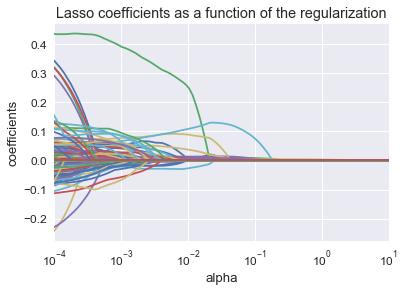

In [297]:
alpha_100 = np.logspace(-4, 1, 100)
coef_lasso = []


for i in alpha_100:
    lasso.set_params(alpha = i)
    lasso.fit(x_train, y_train)
    coef_lasso.append(lasso.coef_)


columns = x_train.columns
df_coef = pd.DataFrame(coef_lasso, index=alpha_100, columns=columns)
title = 'Lasso coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title, legend = False)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()



In [298]:
cv_Lasso = [rmse_cv(linear_model.Lasso(alpha = Alpha)).mean() for Alpha in alpha_100]

**************************************************
Lasso CV:
Minumum RMSE 0.1296 
achieved at alpha = 0.0008111308307896872
**************************************************


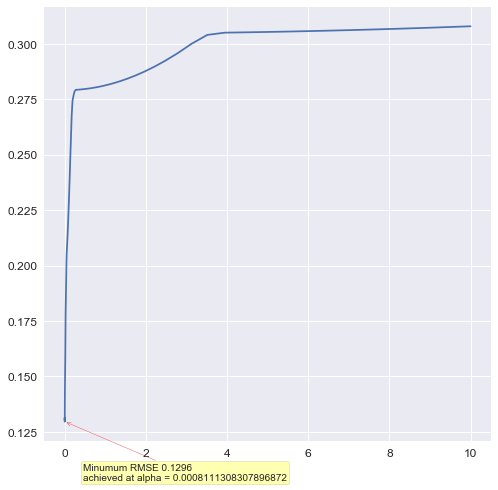

In [299]:
cv_Lasso = pd.Series(cv_Lasso, index = alpha_100)

fig, ax = plt.subplots(figsize=(8,8));
ax.plot(alpha_100,cv_Lasso);

alpha0 = cv_Lasso[cv_Lasso == cv_Lasso.min()].index[0];
rmse0 = cv_Lasso.min();
s = 'Minumum RMSE {:.4f} \nachieved at alpha = {}'.format(rmse0,alpha0)
ax.annotate(s, xy=(alpha0, rmse0),
               xycoords='data',
               xytext=(alpha_100.mean()/2, cv_Lasso.mean()/2),
               #textcoords='offset points',
               bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
               arrowprops=dict(arrowstyle='->',color='red'))


print('*'*50)
print('Lasso CV:')
print(s)
print('*'*50)

In [300]:
# ridgemodel = make_pipeline(preprocessing.StandardScaler(), Ridge(alpha =0.0005, random_state=1))

In [301]:
# score = rmse_cv(ridgemodel)
# print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

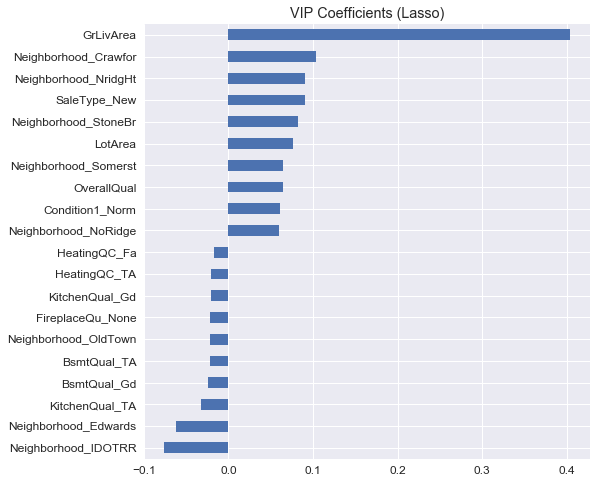

In [302]:
model_Lasso = Lasso(alpha0).fit(x_train, y_train);


coeffs_Lasso = pd.Series(model_Lasso.coef_, index = x_train.columns);
vip_coeffs_Lasso = pd.concat([coeffs_Lasso.sort_values().head(10),
                              coeffs_Lasso.sort_values().tail(10)])


fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_Lasso.plot(kind = "barh");
plt.title("VIP Coefficients (Lasso)");

**************************************************
Lasso Performace: R^2 = 0.9058
**************************************************
Lasso Performace: RMSE = 0.1112
**************************************************


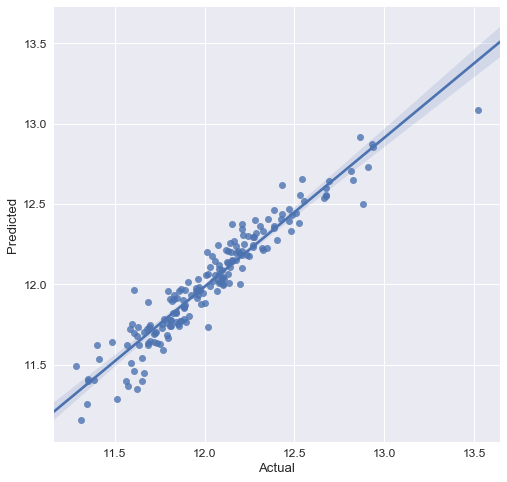

In [303]:
predictions_Lasso = pd.DataFrame({"Predicted":model_Lasso.predict(x_test), 
                                  "Actual":y_test});
predictions_Lasso["Residual"] = predictions_Lasso.Actual - predictions_Lasso.Predicted;


print('*'*50)
print('Lasso Performace: R^2 = {:.4f}'.format(model_Lasso.score(x_test, y_test)))
print('*'*50)
print('Lasso Performace: RMSE = {:.4f}'.format(rmse(predictions_Lasso.Residual)))
print('*'*50)


fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_Lasso.Actual, predictions_Lasso.Predicted);
#ax.set_title('')

## 4.4 Random Forest 

In [409]:
import re
import pandas as pd
import os
import seaborn as sns
import numpy as np
import warnings
import math
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Normalize SalePrice variable

In [410]:
randomtrain = housingtrain.copy()

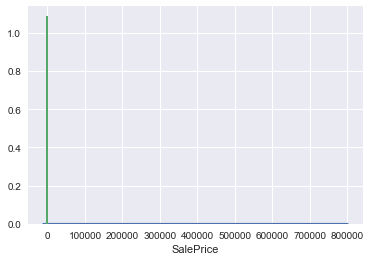

In [411]:
sns.distplot(randomtrain.SalePrice, bins = 20)
sns.distplot([np.log(randomtrain.SalePrice + 1)], bins = 20)

# Converting SalePrice to Log
randomtrain.SalePrice = np.log(randomtrain.SalePrice)


# Dummify and Seperate Training Set to Another Training and Test Set

In [412]:
from copy import deepcopy
import sklearn.model_selection as ms

# Creating a deep copy of training set 
house_train_copy = deepcopy(randomtrain)

house_train_x = pd.get_dummies(house_train_copy.drop('SalePrice', axis = 1))
house_train_y = house_train_copy.SalePrice.values.reshape(-1,1)

# Create sperate out original training set to the new training and test set
x_train, x_test, y_train, y_test = ms.train_test_split(house_train_x, \
                                                       house_train_y, \
                                                       test_size = 1/5, \
                                                       random_state = 0)



# Fitting Decision Tree

In [413]:
from sklearn import tree

# Train decision tree
tree_model_1 = tree.DecisionTreeRegressor(max_depth = 5)
tree_model_1.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### First try, got 84% R sq on training, and 75% R sq on test

In [414]:
print('Training Score:',tree_model_1.score(x_train, y_train))
print('Test Score:',tree_model_1.score(x_test, y_test))

Training Score: 0.846427259999
Test Score: 0.742987468474


### Error : Training RMSE = .1582 , Testing RMSE = .1938

In [415]:
print('Training RMSE:' , math.sqrt(mean_squared_error(y_train, tree_model_1.predict(x_train))))
print('Test RMSE:' , math.sqrt(mean_squared_error(y_test, tree_model_1.predict(x_test))))

Training RMSE: 0.15746858112911252
Test RMSE: 0.19726037776449004


### These were the top 10 variables

Engineered features not showing up

In [417]:
result_tree1 = pd.concat([ pd.DataFrame(x_train.columns.values),  pd.DataFrame(tree_model_1.feature_importances_)], axis = 1)
result_tree1.columns = ['Feature', 'Importance']
result_tree1 = result_tree1.sort_values(by = 'Importance', ascending = False).head(10)
result_tree1

,Feature,Importance
23,OverallQual,0.652335
13,GrLivArea,0.134589
26,TotalBsmtSF,0.071647
68,CentralAir_N,0.028613
35,Parking_Capacitance,0.019861
3,BsmtFinSF1,0.015443
34,Bath_Capacitance,0.014795
22,OverallCond,0.013685
15,KitchenAbvGr,0.013290
210,MSZoning_C (all),0.010089


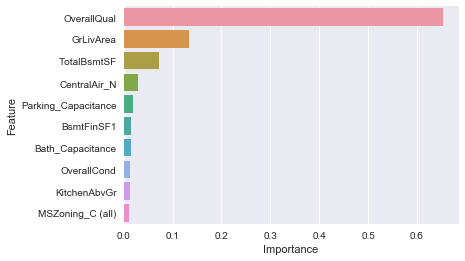

In [418]:
sns.barplot(x = 'Importance', y = 'Feature', data=result_tree1)

# Tuning Decision Tree

In [419]:
from sklearn.grid_search import GridSearchCV

tree_model = tree.DecisionTreeRegressor()

param_grid = [{'max_depth': np.arange(1,21), 
              'min_samples_leaf': np.arange(1,10)}]

tree_model.set_params(random_state = 0)

grid_search = GridSearchCV(tree_model, param_grid=param_grid, cv = 10, verbose = 2)

grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] ........................ max_depth=1, min_samples_leaf=1 -   0.0s
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] ........................ max_depth=1, min_samples_leaf=1 -   0.0s
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] ........................ max_depth=1, min_samples_leaf=1 -   0.0s
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] ........................ max_depth=1, min_samples_leaf=1 -   0.0s
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] ........................ max_depth=1, min_samples_leaf=1 -   0.0s
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] ........................ max_depth=1, min_samples_leaf=1 -   0.0s
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] .......

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........................ max_depth=1, min_samples_leaf=3 -   0.0s
[CV] max_depth=1, min_samples_leaf=3 .................................
[CV] ........................ max_depth=1, min_samples_leaf=3 -   0.0s
[CV] max_depth=1, min_samples_leaf=3 .................................
[CV] ........................ max_depth=1, min_samples_leaf=3 -   0.0s
[CV] max_depth=1, min_samples_leaf=4 .................................
[CV] ........................ max_depth=1, min_samples_leaf=4 -   0.0s
[CV] max_depth=1, min_samples_leaf=4 .................................
[CV] ........................ max_depth=1, min_samples_leaf=4 -   0.0s
[CV] max_depth=1, min_samples_leaf=4 .................................
[CV] ........................ max_depth=1, min_samples_leaf=4 -   0.0s
[CV] max_depth=1, min_samples_leaf=4 .................................
[CV] ........................ max_depth=1, min_samples_leaf=4 -   0.0s
[CV] max_depth=1, min_samples_leaf=4 .................................
[CV] .

[CV] ........................ max_depth=2, min_samples_leaf=1 -   0.0s
[CV] max_depth=2, min_samples_leaf=1 .................................
[CV] ........................ max_depth=2, min_samples_leaf=1 -   0.0s
[CV] max_depth=2, min_samples_leaf=1 .................................
[CV] ........................ max_depth=2, min_samples_leaf=1 -   0.0s
[CV] max_depth=2, min_samples_leaf=1 .................................
[CV] ........................ max_depth=2, min_samples_leaf=1 -   0.0s
[CV] max_depth=2, min_samples_leaf=1 .................................
[CV] ........................ max_depth=2, min_samples_leaf=1 -   0.0s
[CV] max_depth=2, min_samples_leaf=1 .................................
[CV] ........................ max_depth=2, min_samples_leaf=1 -   0.0s
[CV] max_depth=2, min_samples_leaf=1 .................................
[CV] ........................ max_depth=2, min_samples_leaf=1 -   0.0s
[CV] max_depth=2, min_samples_leaf=1 .................................
[CV] .

[CV] ........................ max_depth=2, min_samples_leaf=7 -   0.0s
[CV] max_depth=2, min_samples_leaf=7 .................................
[CV] ........................ max_depth=2, min_samples_leaf=7 -   0.0s
[CV] max_depth=2, min_samples_leaf=7 .................................
[CV] ........................ max_depth=2, min_samples_leaf=7 -   0.0s
[CV] max_depth=2, min_samples_leaf=7 .................................
[CV] ........................ max_depth=2, min_samples_leaf=7 -   0.0s
[CV] max_depth=2, min_samples_leaf=8 .................................
[CV] ........................ max_depth=2, min_samples_leaf=8 -   0.0s
[CV] max_depth=2, min_samples_leaf=8 .................................
[CV] ........................ max_depth=2, min_samples_leaf=8 -   0.0s
[CV] max_depth=2, min_samples_leaf=8 .................................
[CV] ........................ max_depth=2, min_samples_leaf=8 -   0.0s
[CV] max_depth=2, min_samples_leaf=8 .................................
[CV] .

[CV] max_depth=3, min_samples_leaf=5 .................................
[CV] ........................ max_depth=3, min_samples_leaf=5 -   0.0s
[CV] max_depth=3, min_samples_leaf=5 .................................
[CV] ........................ max_depth=3, min_samples_leaf=5 -   0.0s
[CV] max_depth=3, min_samples_leaf=5 .................................
[CV] ........................ max_depth=3, min_samples_leaf=5 -   0.0s
[CV] max_depth=3, min_samples_leaf=5 .................................
[CV] ........................ max_depth=3, min_samples_leaf=5 -   0.0s
[CV] max_depth=3, min_samples_leaf=5 .................................
[CV] ........................ max_depth=3, min_samples_leaf=5 -   0.0s
[CV] max_depth=3, min_samples_leaf=6 .................................
[CV] ........................ max_depth=3, min_samples_leaf=6 -   0.0s
[CV] max_depth=3, min_samples_leaf=6 .................................
[CV] ........................ max_depth=3, min_samples_leaf=6 -   0.0s
[CV] m

[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ........................ max_depth=4, min_samples_leaf=2 -   0.0s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ........................ max_depth=4, min_samples_leaf=2 -   0.0s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ........................ max_depth=4, min_samples_leaf=2 -   0.0s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ........................ max_depth=4, min_samples_leaf=2 -   0.0s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ........................ max_depth=4, min_samples_leaf=2 -   0.0s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ........................ max_depth=4, min_samples_leaf=2 -   0.0s
[CV] max_depth=4, min_samples_leaf=3 .................................
[CV] ........................ max_depth=4, min_samples_leaf=3 -   0.0s
[CV] m

[CV] ........................ max_depth=4, min_samples_leaf=8 -   0.0s
[CV] max_depth=4, min_samples_leaf=8 .................................
[CV] ........................ max_depth=4, min_samples_leaf=8 -   0.0s
[CV] max_depth=4, min_samples_leaf=8 .................................
[CV] ........................ max_depth=4, min_samples_leaf=8 -   0.0s
[CV] max_depth=4, min_samples_leaf=8 .................................
[CV] ........................ max_depth=4, min_samples_leaf=8 -   0.0s
[CV] max_depth=4, min_samples_leaf=8 .................................
[CV] ........................ max_depth=4, min_samples_leaf=8 -   0.0s
[CV] max_depth=4, min_samples_leaf=8 .................................
[CV] ........................ max_depth=4, min_samples_leaf=8 -   0.0s
[CV] max_depth=4, min_samples_leaf=8 .................................
[CV] ........................ max_depth=4, min_samples_leaf=8 -   0.0s
[CV] max_depth=4, min_samples_leaf=9 .................................
[CV] .

[CV] ........................ max_depth=5, min_samples_leaf=6 -   0.0s
[CV] max_depth=5, min_samples_leaf=6 .................................
[CV] ........................ max_depth=5, min_samples_leaf=6 -   0.0s
[CV] max_depth=5, min_samples_leaf=6 .................................
[CV] ........................ max_depth=5, min_samples_leaf=6 -   0.0s
[CV] max_depth=5, min_samples_leaf=6 .................................
[CV] ........................ max_depth=5, min_samples_leaf=6 -   0.0s
[CV] max_depth=5, min_samples_leaf=6 .................................
[CV] ........................ max_depth=5, min_samples_leaf=6 -   0.0s
[CV] max_depth=5, min_samples_leaf=6 .................................
[CV] ........................ max_depth=5, min_samples_leaf=6 -   0.0s
[CV] max_depth=5, min_samples_leaf=6 .................................
[CV] ........................ max_depth=5, min_samples_leaf=6 -   0.0s
[CV] max_depth=5, min_samples_leaf=6 .................................
[CV] .

[CV] ........................ max_depth=6, min_samples_leaf=3 -   0.0s
[CV] max_depth=6, min_samples_leaf=3 .................................
[CV] ........................ max_depth=6, min_samples_leaf=3 -   0.0s
[CV] max_depth=6, min_samples_leaf=3 .................................
[CV] ........................ max_depth=6, min_samples_leaf=3 -   0.0s
[CV] max_depth=6, min_samples_leaf=3 .................................
[CV] ........................ max_depth=6, min_samples_leaf=3 -   0.0s
[CV] max_depth=6, min_samples_leaf=3 .................................
[CV] ........................ max_depth=6, min_samples_leaf=3 -   0.0s
[CV] max_depth=6, min_samples_leaf=3 .................................
[CV] ........................ max_depth=6, min_samples_leaf=3 -   0.0s
[CV] max_depth=6, min_samples_leaf=3 .................................
[CV] ........................ max_depth=6, min_samples_leaf=3 -   0.0s
[CV] max_depth=6, min_samples_leaf=3 .................................
[CV] .

[CV] ........................ max_depth=6, min_samples_leaf=8 -   0.0s
[CV] max_depth=6, min_samples_leaf=8 .................................
[CV] ........................ max_depth=6, min_samples_leaf=8 -   0.0s
[CV] max_depth=6, min_samples_leaf=9 .................................
[CV] ........................ max_depth=6, min_samples_leaf=9 -   0.0s
[CV] max_depth=6, min_samples_leaf=9 .................................
[CV] ........................ max_depth=6, min_samples_leaf=9 -   0.0s
[CV] max_depth=6, min_samples_leaf=9 .................................
[CV] ........................ max_depth=6, min_samples_leaf=9 -   0.0s
[CV] max_depth=6, min_samples_leaf=9 .................................
[CV] ........................ max_depth=6, min_samples_leaf=9 -   0.0s
[CV] max_depth=6, min_samples_leaf=9 .................................
[CV] ........................ max_depth=6, min_samples_leaf=9 -   0.0s
[CV] max_depth=6, min_samples_leaf=9 .................................
[CV] .

[CV] ........................ max_depth=7, min_samples_leaf=5 -   0.0s
[CV] max_depth=7, min_samples_leaf=6 .................................
[CV] ........................ max_depth=7, min_samples_leaf=6 -   0.0s
[CV] max_depth=7, min_samples_leaf=6 .................................
[CV] ........................ max_depth=7, min_samples_leaf=6 -   0.0s
[CV] max_depth=7, min_samples_leaf=6 .................................
[CV] ........................ max_depth=7, min_samples_leaf=6 -   0.0s
[CV] max_depth=7, min_samples_leaf=6 .................................
[CV] ........................ max_depth=7, min_samples_leaf=6 -   0.0s
[CV] max_depth=7, min_samples_leaf=6 .................................
[CV] ........................ max_depth=7, min_samples_leaf=6 -   0.0s
[CV] max_depth=7, min_samples_leaf=6 .................................
[CV] ........................ max_depth=7, min_samples_leaf=6 -   0.0s
[CV] max_depth=7, min_samples_leaf=6 .................................
[CV] .

[CV] ........................ max_depth=8, min_samples_leaf=2 -   0.0s
[CV] max_depth=8, min_samples_leaf=3 .................................
[CV] ........................ max_depth=8, min_samples_leaf=3 -   0.0s
[CV] max_depth=8, min_samples_leaf=3 .................................
[CV] ........................ max_depth=8, min_samples_leaf=3 -   0.0s
[CV] max_depth=8, min_samples_leaf=3 .................................
[CV] ........................ max_depth=8, min_samples_leaf=3 -   0.0s
[CV] max_depth=8, min_samples_leaf=3 .................................
[CV] ........................ max_depth=8, min_samples_leaf=3 -   0.0s
[CV] max_depth=8, min_samples_leaf=3 .................................
[CV] ........................ max_depth=8, min_samples_leaf=3 -   0.0s
[CV] max_depth=8, min_samples_leaf=3 .................................
[CV] ........................ max_depth=8, min_samples_leaf=3 -   0.0s
[CV] max_depth=8, min_samples_leaf=3 .................................
[CV] .

[CV] ........................ max_depth=8, min_samples_leaf=8 -   0.0s
[CV] max_depth=8, min_samples_leaf=8 .................................
[CV] ........................ max_depth=8, min_samples_leaf=8 -   0.0s
[CV] max_depth=8, min_samples_leaf=9 .................................
[CV] ........................ max_depth=8, min_samples_leaf=9 -   0.0s
[CV] max_depth=8, min_samples_leaf=9 .................................
[CV] ........................ max_depth=8, min_samples_leaf=9 -   0.0s
[CV] max_depth=8, min_samples_leaf=9 .................................
[CV] ........................ max_depth=8, min_samples_leaf=9 -   0.0s
[CV] max_depth=8, min_samples_leaf=9 .................................
[CV] ........................ max_depth=8, min_samples_leaf=9 -   0.0s
[CV] max_depth=8, min_samples_leaf=9 .................................
[CV] ........................ max_depth=8, min_samples_leaf=9 -   0.0s
[CV] max_depth=8, min_samples_leaf=9 .................................
[CV] .

[CV] ........................ max_depth=9, min_samples_leaf=5 -   0.0s
[CV] max_depth=9, min_samples_leaf=5 .................................
[CV] ........................ max_depth=9, min_samples_leaf=5 -   0.0s
[CV] max_depth=9, min_samples_leaf=5 .................................
[CV] ........................ max_depth=9, min_samples_leaf=5 -   0.0s
[CV] max_depth=9, min_samples_leaf=6 .................................
[CV] ........................ max_depth=9, min_samples_leaf=6 -   0.0s
[CV] max_depth=9, min_samples_leaf=6 .................................
[CV] ........................ max_depth=9, min_samples_leaf=6 -   0.0s
[CV] max_depth=9, min_samples_leaf=6 .................................
[CV] ........................ max_depth=9, min_samples_leaf=6 -   0.0s
[CV] max_depth=9, min_samples_leaf=6 .................................
[CV] ........................ max_depth=9, min_samples_leaf=6 -   0.0s
[CV] max_depth=9, min_samples_leaf=6 .................................
[CV] .

[CV] ....................... max_depth=10, min_samples_leaf=2 -   0.1s
[CV] max_depth=10, min_samples_leaf=2 ................................
[CV] ....................... max_depth=10, min_samples_leaf=2 -   0.0s
[CV] max_depth=10, min_samples_leaf=2 ................................
[CV] ....................... max_depth=10, min_samples_leaf=2 -   0.0s
[CV] max_depth=10, min_samples_leaf=2 ................................
[CV] ....................... max_depth=10, min_samples_leaf=2 -   0.0s
[CV] max_depth=10, min_samples_leaf=3 ................................
[CV] ....................... max_depth=10, min_samples_leaf=3 -   0.0s
[CV] max_depth=10, min_samples_leaf=3 ................................
[CV] ....................... max_depth=10, min_samples_leaf=3 -   0.0s
[CV] max_depth=10, min_samples_leaf=3 ................................
[CV] ....................... max_depth=10, min_samples_leaf=3 -   0.1s
[CV] max_depth=10, min_samples_leaf=3 ................................
[CV] .

[CV] ....................... max_depth=10, min_samples_leaf=8 -   0.0s
[CV] max_depth=10, min_samples_leaf=8 ................................
[CV] ....................... max_depth=10, min_samples_leaf=8 -   0.0s
[CV] max_depth=10, min_samples_leaf=8 ................................
[CV] ....................... max_depth=10, min_samples_leaf=8 -   0.0s
[CV] max_depth=10, min_samples_leaf=8 ................................
[CV] ....................... max_depth=10, min_samples_leaf=8 -   0.0s
[CV] max_depth=10, min_samples_leaf=8 ................................
[CV] ....................... max_depth=10, min_samples_leaf=8 -   0.0s
[CV] max_depth=10, min_samples_leaf=8 ................................
[CV] ....................... max_depth=10, min_samples_leaf=8 -   0.0s
[CV] max_depth=10, min_samples_leaf=9 ................................
[CV] ....................... max_depth=10, min_samples_leaf=9 -   0.0s
[CV] max_depth=10, min_samples_leaf=9 ................................
[CV] .

[CV] ....................... max_depth=11, min_samples_leaf=5 -   0.0s
[CV] max_depth=11, min_samples_leaf=5 ................................
[CV] ....................... max_depth=11, min_samples_leaf=5 -   0.0s
[CV] max_depth=11, min_samples_leaf=5 ................................
[CV] ....................... max_depth=11, min_samples_leaf=5 -   0.0s
[CV] max_depth=11, min_samples_leaf=5 ................................
[CV] ....................... max_depth=11, min_samples_leaf=5 -   0.0s
[CV] max_depth=11, min_samples_leaf=5 ................................
[CV] ....................... max_depth=11, min_samples_leaf=5 -   0.0s
[CV] max_depth=11, min_samples_leaf=6 ................................
[CV] ....................... max_depth=11, min_samples_leaf=6 -   0.0s
[CV] max_depth=11, min_samples_leaf=6 ................................
[CV] ....................... max_depth=11, min_samples_leaf=6 -   0.0s
[CV] max_depth=11, min_samples_leaf=6 ................................
[CV] .

[CV] ....................... max_depth=12, min_samples_leaf=2 -   0.0s
[CV] max_depth=12, min_samples_leaf=2 ................................
[CV] ....................... max_depth=12, min_samples_leaf=2 -   0.0s
[CV] max_depth=12, min_samples_leaf=2 ................................
[CV] ....................... max_depth=12, min_samples_leaf=2 -   0.0s
[CV] max_depth=12, min_samples_leaf=2 ................................
[CV] ....................... max_depth=12, min_samples_leaf=2 -   0.0s
[CV] max_depth=12, min_samples_leaf=3 ................................
[CV] ....................... max_depth=12, min_samples_leaf=3 -   0.0s
[CV] max_depth=12, min_samples_leaf=3 ................................
[CV] ....................... max_depth=12, min_samples_leaf=3 -   0.0s
[CV] max_depth=12, min_samples_leaf=3 ................................
[CV] ....................... max_depth=12, min_samples_leaf=3 -   0.0s
[CV] max_depth=12, min_samples_leaf=3 ................................
[CV] .

[CV] ....................... max_depth=12, min_samples_leaf=8 -   0.0s
[CV] max_depth=12, min_samples_leaf=8 ................................
[CV] ....................... max_depth=12, min_samples_leaf=8 -   0.0s
[CV] max_depth=12, min_samples_leaf=9 ................................
[CV] ....................... max_depth=12, min_samples_leaf=9 -   0.0s
[CV] max_depth=12, min_samples_leaf=9 ................................
[CV] ....................... max_depth=12, min_samples_leaf=9 -   0.1s
[CV] max_depth=12, min_samples_leaf=9 ................................
[CV] ....................... max_depth=12, min_samples_leaf=9 -   0.0s
[CV] max_depth=12, min_samples_leaf=9 ................................
[CV] ....................... max_depth=12, min_samples_leaf=9 -   0.0s
[CV] max_depth=12, min_samples_leaf=9 ................................
[CV] ....................... max_depth=12, min_samples_leaf=9 -   0.1s
[CV] max_depth=12, min_samples_leaf=9 ................................
[CV] .

[CV] ....................... max_depth=13, min_samples_leaf=5 -   0.0s
[CV] max_depth=13, min_samples_leaf=5 ................................
[CV] ....................... max_depth=13, min_samples_leaf=5 -   0.0s
[CV] max_depth=13, min_samples_leaf=6 ................................
[CV] ....................... max_depth=13, min_samples_leaf=6 -   0.0s
[CV] max_depth=13, min_samples_leaf=6 ................................
[CV] ....................... max_depth=13, min_samples_leaf=6 -   0.0s
[CV] max_depth=13, min_samples_leaf=6 ................................
[CV] ....................... max_depth=13, min_samples_leaf=6 -   0.0s
[CV] max_depth=13, min_samples_leaf=6 ................................
[CV] ....................... max_depth=13, min_samples_leaf=6 -   0.0s
[CV] max_depth=13, min_samples_leaf=6 ................................
[CV] ....................... max_depth=13, min_samples_leaf=6 -   0.0s
[CV] max_depth=13, min_samples_leaf=6 ................................
[CV] .

[CV] ....................... max_depth=14, min_samples_leaf=2 -   0.0s
[CV] max_depth=14, min_samples_leaf=3 ................................
[CV] ....................... max_depth=14, min_samples_leaf=3 -   0.0s
[CV] max_depth=14, min_samples_leaf=3 ................................
[CV] ....................... max_depth=14, min_samples_leaf=3 -   0.0s
[CV] max_depth=14, min_samples_leaf=3 ................................
[CV] ....................... max_depth=14, min_samples_leaf=3 -   0.0s
[CV] max_depth=14, min_samples_leaf=3 ................................
[CV] ....................... max_depth=14, min_samples_leaf=3 -   0.0s
[CV] max_depth=14, min_samples_leaf=3 ................................
[CV] ....................... max_depth=14, min_samples_leaf=3 -   0.0s
[CV] max_depth=14, min_samples_leaf=3 ................................
[CV] ....................... max_depth=14, min_samples_leaf=3 -   0.0s
[CV] max_depth=14, min_samples_leaf=3 ................................
[CV] .

[CV] ....................... max_depth=14, min_samples_leaf=9 -   0.0s
[CV] max_depth=14, min_samples_leaf=9 ................................
[CV] ....................... max_depth=14, min_samples_leaf=9 -   0.0s
[CV] max_depth=14, min_samples_leaf=9 ................................
[CV] ....................... max_depth=14, min_samples_leaf=9 -   0.0s
[CV] max_depth=14, min_samples_leaf=9 ................................
[CV] ....................... max_depth=14, min_samples_leaf=9 -   0.0s
[CV] max_depth=14, min_samples_leaf=9 ................................
[CV] ....................... max_depth=14, min_samples_leaf=9 -   0.0s
[CV] max_depth=14, min_samples_leaf=9 ................................
[CV] ....................... max_depth=14, min_samples_leaf=9 -   0.0s
[CV] max_depth=14, min_samples_leaf=9 ................................
[CV] ....................... max_depth=14, min_samples_leaf=9 -   0.0s
[CV] max_depth=14, min_samples_leaf=9 ................................
[CV] .

[CV] max_depth=15, min_samples_leaf=6 ................................
[CV] ....................... max_depth=15, min_samples_leaf=6 -   0.0s
[CV] max_depth=15, min_samples_leaf=6 ................................
[CV] ....................... max_depth=15, min_samples_leaf=6 -   0.0s
[CV] max_depth=15, min_samples_leaf=6 ................................
[CV] ....................... max_depth=15, min_samples_leaf=6 -   0.0s
[CV] max_depth=15, min_samples_leaf=6 ................................
[CV] ....................... max_depth=15, min_samples_leaf=6 -   0.0s
[CV] max_depth=15, min_samples_leaf=6 ................................
[CV] ....................... max_depth=15, min_samples_leaf=6 -   0.0s
[CV] max_depth=15, min_samples_leaf=6 ................................
[CV] ....................... max_depth=15, min_samples_leaf=6 -   0.0s
[CV] max_depth=15, min_samples_leaf=6 ................................
[CV] ....................... max_depth=15, min_samples_leaf=6 -   0.0s
[CV] m

[CV] ....................... max_depth=16, min_samples_leaf=3 -   0.0s
[CV] max_depth=16, min_samples_leaf=3 ................................
[CV] ....................... max_depth=16, min_samples_leaf=3 -   0.0s
[CV] max_depth=16, min_samples_leaf=3 ................................
[CV] ....................... max_depth=16, min_samples_leaf=3 -   0.0s
[CV] max_depth=16, min_samples_leaf=3 ................................
[CV] ....................... max_depth=16, min_samples_leaf=3 -   0.0s
[CV] max_depth=16, min_samples_leaf=3 ................................
[CV] ....................... max_depth=16, min_samples_leaf=3 -   0.0s
[CV] max_depth=16, min_samples_leaf=4 ................................
[CV] ....................... max_depth=16, min_samples_leaf=4 -   0.0s
[CV] max_depth=16, min_samples_leaf=4 ................................
[CV] ....................... max_depth=16, min_samples_leaf=4 -   0.0s
[CV] max_depth=16, min_samples_leaf=4 ................................
[CV] .

[CV] ....................... max_depth=17, min_samples_leaf=1 -   0.0s
[CV] max_depth=17, min_samples_leaf=1 ................................
[CV] ....................... max_depth=17, min_samples_leaf=1 -   0.1s
[CV] max_depth=17, min_samples_leaf=1 ................................
[CV] ....................... max_depth=17, min_samples_leaf=1 -   0.1s
[CV] max_depth=17, min_samples_leaf=1 ................................
[CV] ....................... max_depth=17, min_samples_leaf=1 -   0.0s
[CV] max_depth=17, min_samples_leaf=1 ................................
[CV] ....................... max_depth=17, min_samples_leaf=1 -   0.0s
[CV] max_depth=17, min_samples_leaf=1 ................................
[CV] ....................... max_depth=17, min_samples_leaf=1 -   0.0s
[CV] max_depth=17, min_samples_leaf=1 ................................
[CV] ....................... max_depth=17, min_samples_leaf=1 -   0.0s
[CV] max_depth=17, min_samples_leaf=1 ................................
[CV] .

[CV] max_depth=17, min_samples_leaf=6 ................................
[CV] ....................... max_depth=17, min_samples_leaf=6 -   0.0s
[CV] max_depth=17, min_samples_leaf=7 ................................
[CV] ....................... max_depth=17, min_samples_leaf=7 -   0.0s
[CV] max_depth=17, min_samples_leaf=7 ................................
[CV] ....................... max_depth=17, min_samples_leaf=7 -   0.0s
[CV] max_depth=17, min_samples_leaf=7 ................................
[CV] ....................... max_depth=17, min_samples_leaf=7 -   0.0s
[CV] max_depth=17, min_samples_leaf=7 ................................
[CV] ....................... max_depth=17, min_samples_leaf=7 -   0.0s
[CV] max_depth=17, min_samples_leaf=7 ................................
[CV] ....................... max_depth=17, min_samples_leaf=7 -   0.0s
[CV] max_depth=17, min_samples_leaf=7 ................................
[CV] ....................... max_depth=17, min_samples_leaf=7 -   0.0s
[CV] m

[CV] ....................... max_depth=18, min_samples_leaf=3 -   0.0s
[CV] max_depth=18, min_samples_leaf=3 ................................
[CV] ....................... max_depth=18, min_samples_leaf=3 -   0.0s
[CV] max_depth=18, min_samples_leaf=3 ................................
[CV] ....................... max_depth=18, min_samples_leaf=3 -   0.0s
[CV] max_depth=18, min_samples_leaf=4 ................................
[CV] ....................... max_depth=18, min_samples_leaf=4 -   0.0s
[CV] max_depth=18, min_samples_leaf=4 ................................
[CV] ....................... max_depth=18, min_samples_leaf=4 -   0.0s
[CV] max_depth=18, min_samples_leaf=4 ................................
[CV] ....................... max_depth=18, min_samples_leaf=4 -   0.0s
[CV] max_depth=18, min_samples_leaf=4 ................................
[CV] ....................... max_depth=18, min_samples_leaf=4 -   0.0s
[CV] max_depth=18, min_samples_leaf=4 ................................
[CV] .

[CV] ....................... max_depth=18, min_samples_leaf=9 -   0.0s
[CV] max_depth=18, min_samples_leaf=9 ................................
[CV] ....................... max_depth=18, min_samples_leaf=9 -   0.0s
[CV] max_depth=18, min_samples_leaf=9 ................................
[CV] ....................... max_depth=18, min_samples_leaf=9 -   0.0s
[CV] max_depth=18, min_samples_leaf=9 ................................
[CV] ....................... max_depth=18, min_samples_leaf=9 -   0.0s
[CV] max_depth=19, min_samples_leaf=1 ................................
[CV] ....................... max_depth=19, min_samples_leaf=1 -   0.0s
[CV] max_depth=19, min_samples_leaf=1 ................................
[CV] ....................... max_depth=19, min_samples_leaf=1 -   0.1s
[CV] max_depth=19, min_samples_leaf=1 ................................
[CV] ....................... max_depth=19, min_samples_leaf=1 -   0.0s
[CV] max_depth=19, min_samples_leaf=1 ................................
[CV] .

[CV] max_depth=19, min_samples_leaf=6 ................................
[CV] ....................... max_depth=19, min_samples_leaf=6 -   0.0s
[CV] max_depth=19, min_samples_leaf=6 ................................
[CV] ....................... max_depth=19, min_samples_leaf=6 -   0.0s
[CV] max_depth=19, min_samples_leaf=6 ................................
[CV] ....................... max_depth=19, min_samples_leaf=6 -   0.0s
[CV] max_depth=19, min_samples_leaf=7 ................................
[CV] ....................... max_depth=19, min_samples_leaf=7 -   0.0s
[CV] max_depth=19, min_samples_leaf=7 ................................
[CV] ....................... max_depth=19, min_samples_leaf=7 -   0.0s
[CV] max_depth=19, min_samples_leaf=7 ................................
[CV] ....................... max_depth=19, min_samples_leaf=7 -   0.0s
[CV] max_depth=19, min_samples_leaf=7 ................................
[CV] ....................... max_depth=19, min_samples_leaf=7 -   0.0s
[CV] m

[CV] ....................... max_depth=20, min_samples_leaf=3 -   0.0s
[CV] max_depth=20, min_samples_leaf=3 ................................
[CV] ....................... max_depth=20, min_samples_leaf=3 -   0.0s
[CV] max_depth=20, min_samples_leaf=3 ................................
[CV] ....................... max_depth=20, min_samples_leaf=3 -   0.0s
[CV] max_depth=20, min_samples_leaf=3 ................................
[CV] ....................... max_depth=20, min_samples_leaf=3 -   0.0s
[CV] max_depth=20, min_samples_leaf=3 ................................
[CV] ....................... max_depth=20, min_samples_leaf=3 -   0.0s
[CV] max_depth=20, min_samples_leaf=4 ................................
[CV] ....................... max_depth=20, min_samples_leaf=4 -   0.0s
[CV] max_depth=20, min_samples_leaf=4 ................................
[CV] ....................... max_depth=20, min_samples_leaf=4 -   0.0s
[CV] max_depth=20, min_samples_leaf=4 ................................
[CV] .

[CV] max_depth=20, min_samples_leaf=9 ................................
[CV] ....................... max_depth=20, min_samples_leaf=9 -   0.0s
[CV] max_depth=20, min_samples_leaf=9 ................................
[CV] ....................... max_depth=20, min_samples_leaf=9 -   0.0s
[CV] max_depth=20, min_samples_leaf=9 ................................
[CV] ....................... max_depth=20, min_samples_leaf=9 -   0.0s


[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:   53.8s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]), 'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [421]:
grid_search.best_params_

{'max_depth': 9, 'min_samples_leaf': 8}

Best hyperparamters are max depth = 11, min_samples_leaf = 8

### Refit Decision Tree with Best Parameters

In [157]:
tree_model = tree.DecisionTreeRegressor(max_depth = 11, 
                                        min_samples_leaf = 8)

tree_model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### R sq is now 91% on training and 77% on test

Though training score increased alot while Test score improves slightly from 75% to 77%

In [159]:
print('Training Score:',tree_model.score(x_train, y_train))
print('Test Score:',tree_model.score(x_test, y_test))

Training Score: 0.911885038298
Test Score: 0.772905474593


### Error : Training RMSE = .1192 , Testing RMSE = .1854

Both Training and Test RMSE lowered in tuned tree. Test RMSE went from .1938 to .1854

In [161]:
print('Training RMSE:' , math.sqrt(mean_squared_error(y_train, tree_model.predict(x_train))))
print('Test RMSE:' , math.sqrt(mean_squared_error(y_test, tree_model.predict(x_test))))

Training RMSE: 0.1192783646765266
Test RMSE: 0.1854240416984672


### Top 10 Important Variables for this fitted tree

Both of the bath engineerd features continue to rank higher in importance compared to the original

In [242]:
result_tree2 = pd.concat([pd.DataFrame(x_train.columns.values),pd.DataFrame(tree_model.feature_importances_)], axis = 1)
result_tree2.columns = ['Feature','Importance']
result_tree2 = result_tree2.sort_values(by = 'Importance', ascending = False).head(10)
result_tree2

,Feature,Importance
23,OverallQual,0.607759
13,GrLivArea,0.133346
26,TotalBsmtSF,0.082345
3,BsmtFinSF1,0.023896
69,CentralAir_N,0.021704
36,Parking_Capacity,0.020077
22,OverallCond,0.017090
15,KitchenAbvGr,0.012336
0,1stFlrSF,0.009318
25,TotRmsAbvGrd,0.007056


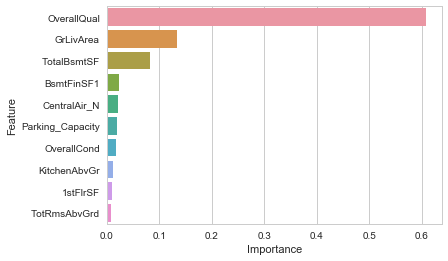

In [243]:
sns.barplot(x = 'Importance', y = 'Feature', data=result_tree2)

# Thoughts so far...

I think we can do better on the test score...our model is only fit on one set of observations, so there is high variance in our model.

However, if we fit the model on MULTIPLE sets of observations then we can lower this variance by averaging a bunch of weak models together

Lets try attacking with Bagged Trees to decrease the variance!

# Fitting Bagged Trees

In [163]:
from sklearn.ensemble import BaggingRegressor

bag_tree = BaggingRegressor(
        tree.DecisionTreeRegressor(),
        n_estimators = 500, 
        max_samples = round(len(x_train)*.67), # bag two thirds of training set
        bootstrap = True,      
        random_state = 0,
        oob_score = True
        )

bag_tree.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=783, n_estimators=500, n_jobs=1, oob_score=True,
         random_state=0, verbose=0, warm_start=False)

### R sq for Training is 97%, OOB 87% and Test 87%. Test score is close to our OOB score.

Bagged Tree model gave us a much higher Test score, goign from 77% to 87% R sqaured!

In [164]:
print('Training Score:', bag_tree.score(x_train, y_train))
print('OOB Score:', bag_tree.oob_score_)
print('Test Score:', bag_tree.score(x_test, y_test))

Training Score: 0.96564487431
OOB Score: 0.869147517835
Test Score: 0.871577103208


### Error Rate: Training RMSE =  .0745 , Test RMSE = .1394

Test RMSE in Bagged Tree continues to go down .1854 to .1394 from the last model (Tuned Decision Tree)

In [165]:
print('Training RMSE:' , math.sqrt(mean_squared_error(y_train, bag_tree.predict(x_train))))
print('Test RMSE:' , math.sqrt(mean_squared_error(y_test, bag_tree.predict(x_test))))

Training RMSE: 0.07447879108934419
Test RMSE: 0.13943889797618808


## Thoughts so far:

Much improved training and test scores!
But, perhaps these trees are WAY too correlated, still increasing too much variance in our model.
Same predictors will be chosen at the top of all our trees
Lets try attacking Random Forest to decorrelate! Go!

# Fitting Random Forest: First Attempt

In [166]:
from sklearn.ensemble import RandomForestRegressor
import math

rf_tree_1 = RandomForestRegressor(n_estimators = 500,
                                max_features = round(math.sqrt(len(x_train.columns))),
                                bootstrap = True,
                                oob_score = True,
                                random_state = 0)

rf_tree_1.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=17, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=True, random_state=0,
           verbose=0, warm_start=False)

## R sq for Training: 98%, OOB: 87%, Test: 87%. No improvement in Test Score...

Training score went up 2 points 

In [167]:
print('Training Score:' ,rf_tree_1.score(x_train, y_train))
print('OOB Score:', rf_tree_1.oob_score_)
print('Test Score:' ,rf_tree_1.score(x_test, y_test))

Training Score: 0.982089020291
OOB Score: 0.867143227395
Test Score: 0.871056589436


### Error Rate: Training RMSE =  .0538 , Test RMSE = .1397

Training RMSE lowers by .02 but No change in Test RMSE

In [169]:
print('Training RMSE:' , math.sqrt(mean_squared_error(y_train, rf_tree_1.predict(x_train))))
print('Test RMSE:' , math.sqrt(mean_squared_error(y_test, rf_tree_1.predict(x_test))))

Training RMSE: 0.05377699352930885
Test RMSE: 0.13972119370939215


GRLiveArea now makes it to the top of the list after using Random Forest. The Bath Engineered Features make it to the top 10 important variables as well. The important of the top 10 features are now more spread out, as compared to the decision trees that select ALL predictors at each split

In [233]:
result_rf1 = pd.concat([pd.DataFrame(x_train.columns.values),pd.DataFrame(rf_tree_1.feature_importances_)], axis = 1)
result_rf1.columns = ['Feature','Importance']
result_rf1 = result_rf1.sort_values(by = 'Importance', ascending = False).head(10)

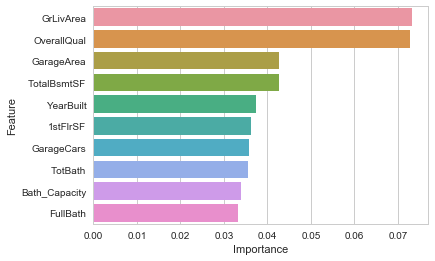

In [234]:
sns.barplot(x = 'Importance', y = 'Feature', data=result_rf1)

# Grid Search CV to Tune Random Forest

In [175]:
from sklearn.grid_search import GridSearchCV

rf_tree_cv = RandomForestRegressor(
                                bootstrap = True,
                                oob_score = True,
                                random_state = 0)

rf_param_grid = [{
        'n_estimators' : [300, 400, 500, 600], #Test[100,250,500,750,1000]
        'max_features' : np.arange(35,38), # First try: np.arange(17,40)
        #'min_samples_leaf' : np.arange(2,9),
        #'max_depth' : np.arange(5,11)
        }]

rf_grid_search = GridSearchCV(rf_tree_cv, param_grid = rf_param_grid, cv = 5)

rf_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [300, 400, 500, 600], 'max_features': array([35, 36, 37])}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

## Best parameters: Max_features = 36, n_estimators = 500

In [177]:
rf_grid_search.best_params_

{'max_features': 36, 'n_estimators': 500}

# Refit Random Forest with Tuned Hyperparameters

In [178]:
rf_tree = RandomForestRegressor(n_estimators = 500,
                                max_features = 36,
                                bootstrap = True,
                                oob_score = True,
                                random_state = 0)


rf_tree.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=36, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=True, random_state=0,
           verbose=0, warm_start=False)

## R sq for Training: 98%, OOB: 87%, Test: 88%

Test score was <1% higher in the tuned Random Forest than the untuned Random Forest model

In [179]:
print('Training Score:', rf_tree.score(x_train, y_train))
print('OOB Score:', rf_tree.oob_score_)
print('Test Score:', rf_tree.score(x_test, y_test))

Training Score: 0.982891279992
OOB Score: 0.873416643755
Test Score: 0.877668748922


### Error: Training RMSE = .0526

In [180]:
from sklearn.metrics import mean_squared_error

print('Training RMSE:' , math.sqrt(mean_squared_error(y_train, rf_tree.predict(x_train))))

Training RMSE: 0.05255882012222655


### Error: Test RMSE = .1361

In [181]:
print('Test RMSE:', math.sqrt(mean_squared_error(y_test, rf_tree.predict(x_test))))

Test RMSE: 0.13609163115664372


### Top 10 Important Variables

In [227]:
result = pd.concat([pd.DataFrame(x_train.columns.values),pd.DataFrame(rf_tree.feature_importances_)], axis = 1)
result.columns = ['Feature','Importance']
result = result.sort_values(by = 'Importance', ascending = False).head(10)

In [217]:
result

,feature,importance
23,OverallQual,0.100629
13,GrLivArea,0.097593
12,GarageCars,0.053279
11,GarageArea,0.051931
28,YearBuilt,0.049150
26,TotalBsmtSF,0.047400
10,FullBath,0.042848
34,TotBath,0.040406
0,1stFlrSF,0.037287
35,Bath_Capacity,0.036373


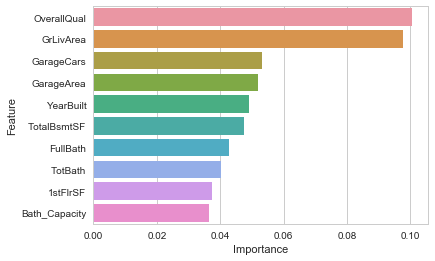

In [228]:
sns.set_style("whitegrid")
sns.barplot(x = 'Importance', y = 'Feature', data=result)

## Thoughts so far:

The random forest models had better training and test scores as well as lower MSE than the decision tree. 

The tuned Random Forest model had slightly higher R^2 than the untuned Random Forest, BUT it also had a slightly higher 

## 4.5 XGBoost

In [351]:
import xgboost

In [352]:
xgtrain = housingtrain.copy()

In [353]:
import sklearn.model_selection as ms

X_train_v, X_test_v, y_train_v, y_test_v = ms.train_test_split(xgtrain.loc[:, xgtrain.columns != 'SalePrice'], xgtrain['SalePrice'], 
                                                       test_size=1/8, random_state=0)

print('Original: {}, {}'.format(xgtrain.shape, xgtrain.shape))
print('Training: {}, {}'.format(x_train.shape, y_train.shape))
print('Test: {}, {}'.format(x_test.shape, y_test.shape))




Original: (1460, 274), (1460, 274)
Training: (1277, 273), (1277,)
Test: (183, 273), (183,)


In [354]:
#log transform the sale prices
y_train_v = np.log1p(y_train_v)
y_test_v = np.log1p(y_test_v)

In [355]:
xgb_paramters = {'learning_rate':[0.005, 0.01, 0.05, 0.1, 0.5],
                 'n_estimators':[50, 100, 200, 500]}

xgb_GridSearch = GridSearchCV(xgboost.XGBRegressor(), param_grid=xgb_paramters)

xgb_GridSearch.fit(X_train_v, y_train_v)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.005, 0.01, 0.05, 0.1, 0.5], 'n_estimators': [50, 100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [358]:
learning_rate0 = xgb_GridSearch.best_params_['learning_rate'];
n_estimators0 = xgb_GridSearch.best_params_['n_estimators'];

In [359]:
xgb_GridSearch.best_score_

0.8924313536681391

In [360]:
'''
xgboost.XGBRegressor(
    max_depth=3, 
    learning_rate=0.1, 
    n_estimators=100, 
    silent=True, 
    objective='reg:linear', 
    booster='gbtree', 
    n_jobs=1, 
    nthread=None, 
    gamma=0, 
    min_child_weight=1, 
    max_delta_step=0, 
    subsample=1, 
    colsample_bytree=1, 
    colsample_bylevel=1, 
    reg_alpha=0, 
    reg_lambda=1, 
    scale_pos_weight=1, 
    base_score=0.5, 
    random_state=0, 
    seed=None, 
    missing=None, 
    **kwargs)
'''


model_xgb = xgboost.XGBRegressor(learning_rate=learning_rate0,
                                 n_estimators=n_estimators0)

model_xgb = model_xgb.fit(X_train_v, y_train_v);

In [361]:
from sklearn.metrics import mean_squared_error

def R2(y_predicted, y_actual):
    # R^2 = 1 - SS_residual / SS_total
    SS_residual = sum((y_predicted - y_actual)**2)
    SS_total = sum((y_actual - y_actual.mean())**2)
    R2 = 1 - SS_residual / SS_total
    return(R2)

def rmse(y_predicted, y_actual):
    return( np.sqrt( mean_squared_error(y_actual, y_predicted) ) )


**************************************************
XGBooster Training Performace: R^2 = 0.9778
**************************************************
XGBooster Training Performace: RMSE = 0.0602
**************************************************


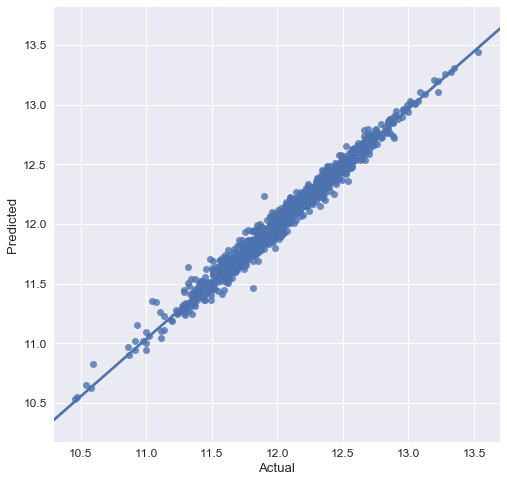

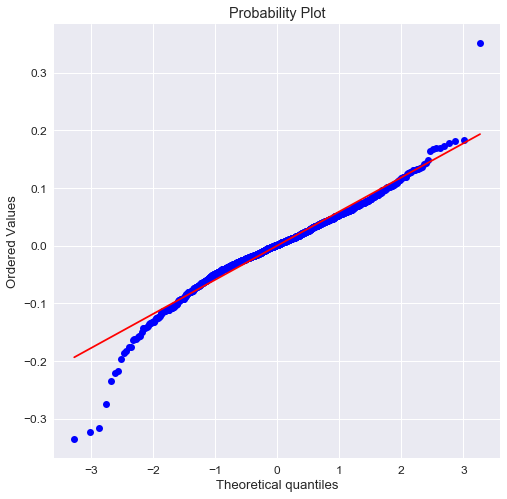

In [362]:
# Training Performance
# The results are put in dataframe "predictions_xgb_train"

predictions_xgb_train = pd.DataFrame({"Predicted":model_xgb.predict(X_train_v), 
                                      "Actual":y_train_v});
predictions_xgb_train["Residual"] = predictions_xgb_train.Actual - predictions_xgb_train.Predicted;


print('*'*50)
print('XGBooster Training Performace: R^2 = {:.4f}'.format(R2(predictions_xgb_train.Predicted,
                                                              predictions_xgb_train.Actual)))
print('*'*50)
print('XGBooster Training Performace: RMSE = {:.4f}'.format(rmse(predictions_xgb_train.Actual,
                                                                 predictions_xgb_train.Predicted)))
print('*'*50)

fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_xgb_train.Actual, predictions_xgb_train.Predicted);
#ax.set_title('')

fig, ax = plt.subplots(figsize=(8,8));
stats.probplot(predictions_xgb_train.Residual, dist="norm", plot=pylab);
pylab.show();

**************************************************
XGBooster Test Performace: R^2 = 0.8831
**************************************************
XGBooster Test Performace: RMSE = 0.1240
**************************************************


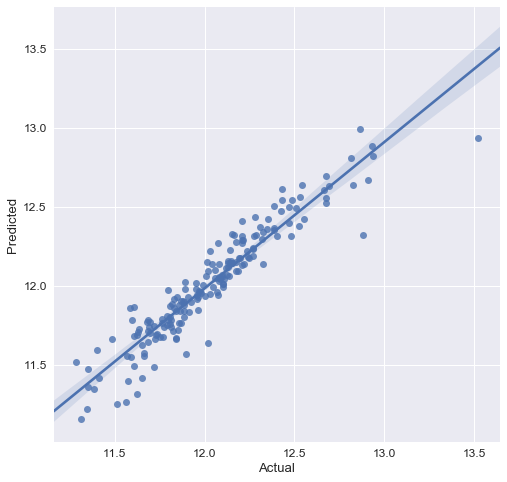

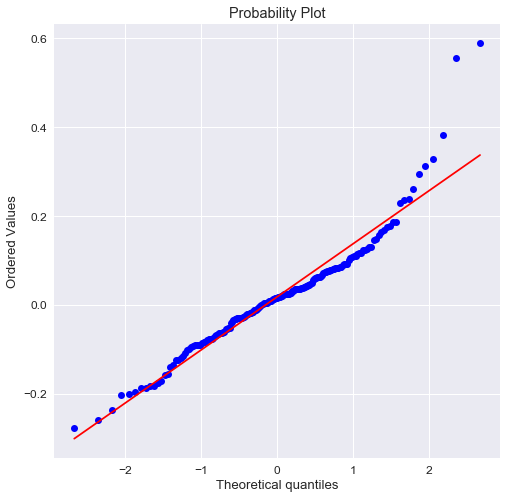

In [363]:
# Test Performance
# The results are put in dataframe "predictions_xgb_test"

predictions_xgb_test = pd.DataFrame({"Predicted":model_xgb.predict(X_test_v), 
                                      "Actual":y_test_v});
predictions_xgb_test["Residual"] = predictions_xgb_test.Actual - predictions_xgb_test.Predicted;


print('*'*50)
print('XGBooster Test Performace: R^2 = {:.4f}'.format(R2(predictions_xgb_test.Predicted,
                                                          predictions_xgb_test.Actual)))
print('*'*50)
print('XGBooster Test Performace: RMSE = {:.4f}'.format(rmse(predictions_xgb_test.Actual,
                                                             predictions_xgb_test.Predicted)))
print('*'*50)

fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_xgb_test.Actual, predictions_xgb_test.Predicted);
#ax.set_title('')

fig, ax = plt.subplots(figsize=(8,8));
stats.probplot(predictions_xgb_test.Residual, dist="norm", plot=pylab);
pylab.show();

## Final Submission

In [326]:
logtestresult = model_Lasso.predict(housingtest)

In [327]:
testresult = np.exp(logtestresult)-1

In [328]:
submission = pd.DataFrame({'Id': testid, 'SalePrice': testresult})
submission.to_csv('./Datasets/Lasso_Prediction.csv', index = False)


## “Why did you choose your methodology?”

## “How was this implemented?”

## “Why does this work?”

## “How did you verify results?”

## “Why is this method superior to what is used in the industry?”